MAPS OF THE ANNUAL EMISSIONS FROM FUME

In [4]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8

#read grid paramenters
grid_Small=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_Small.variables['LON'][0,0,:,:])
lat=np.array(grid_Small.variables['LAT'][0,0,:,:])

In [2]:
# read annual emission file
emissions=netCDF4.Dataset('/data/emisie/EMISIONS_FUME_2015.nc')
emissions_BAU=netCDF4.Dataset('/data/emisie/EMISIONS_BAU_2015.nc')
emissions_W1=netCDF4.Dataset('/data/bussines_as_ussual/EMISIONS_W1_2015.nc')

# save 2-d fields of annual emissions in the numpy array and dictionary dic_ann 
dic_ann={}
dic_ann_W1={}
dic_ann_BAU={}
for i in emissions.variables.keys():
    if i !='TFLAG': 
       dic_ann[i]=np.array(emissions.variables[i][0,0,:,:])
       dic_ann_BAU[i]=np.array(emissions_BAU.variables[i][0,0,:,:])
       dic_ann_W1[i]=np.array(emissions_W1.variables[i][0,0,:,:])

PLOT THE ANNUAL EMISSION MAPS

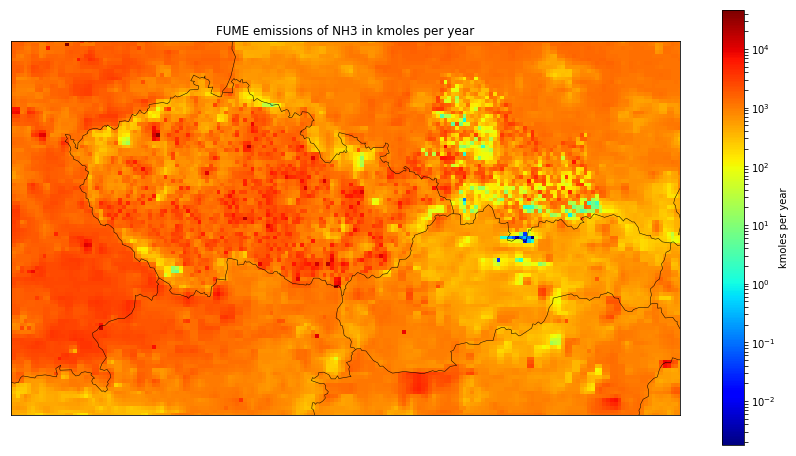

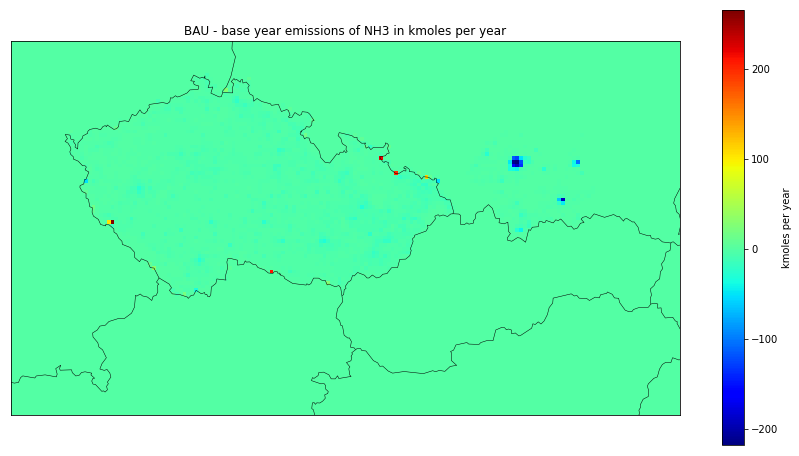

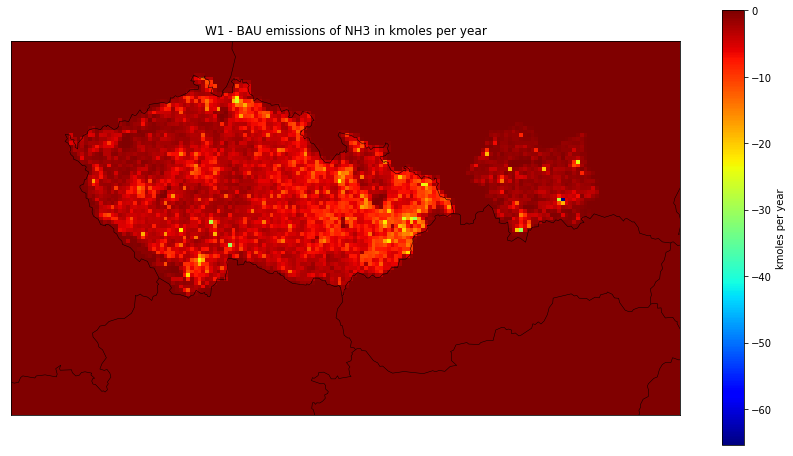

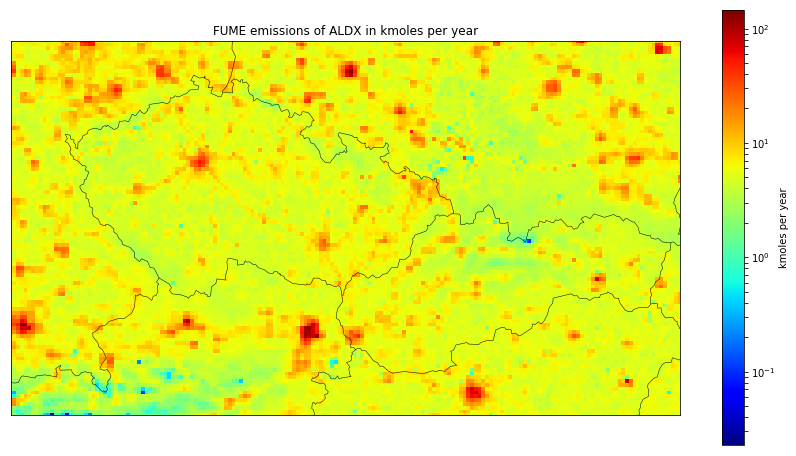

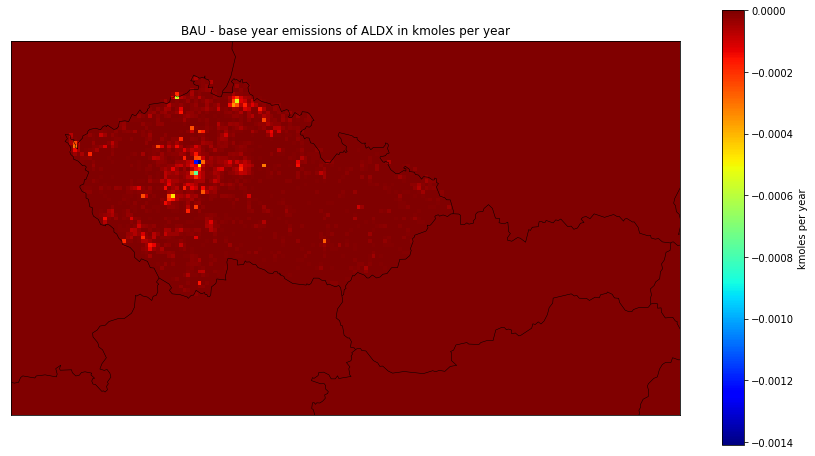

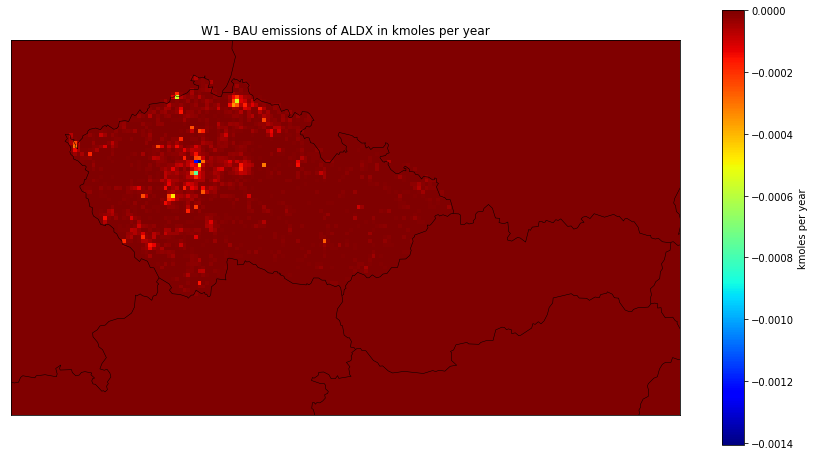

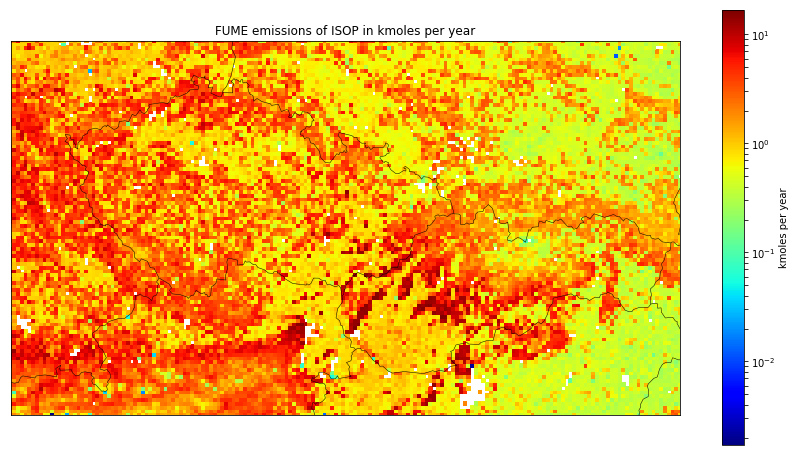

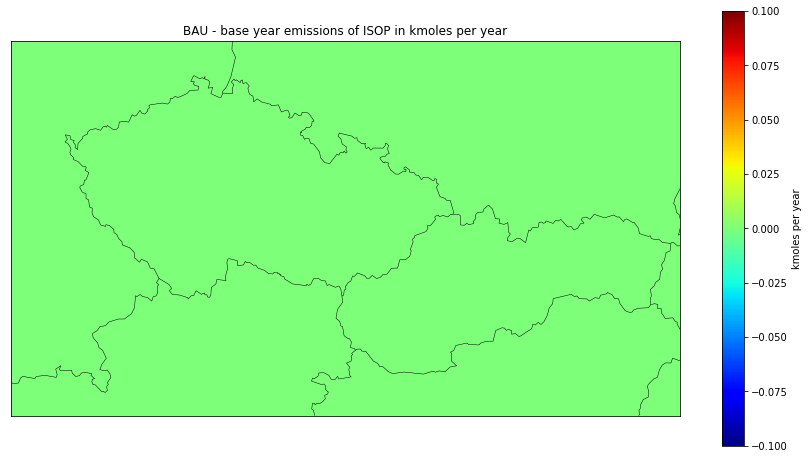

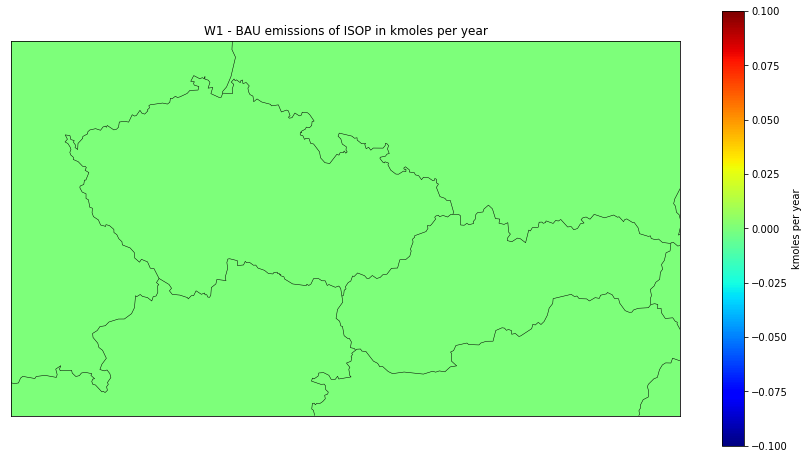

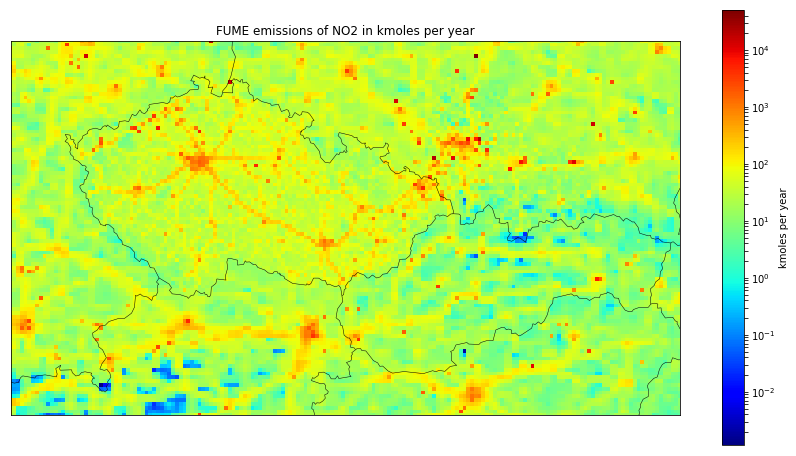

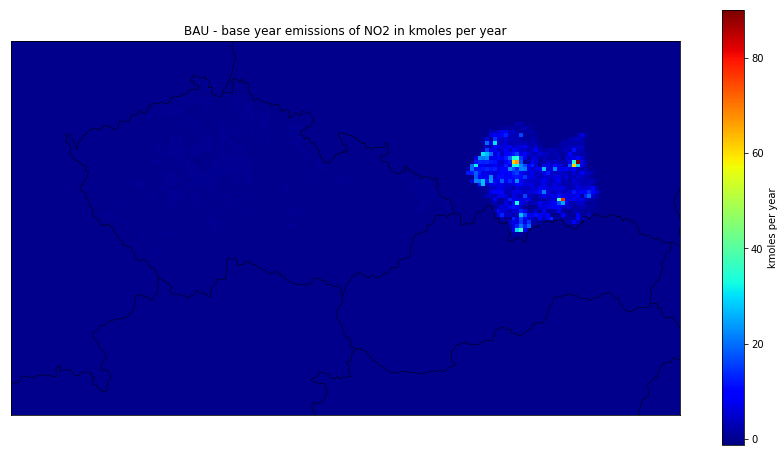

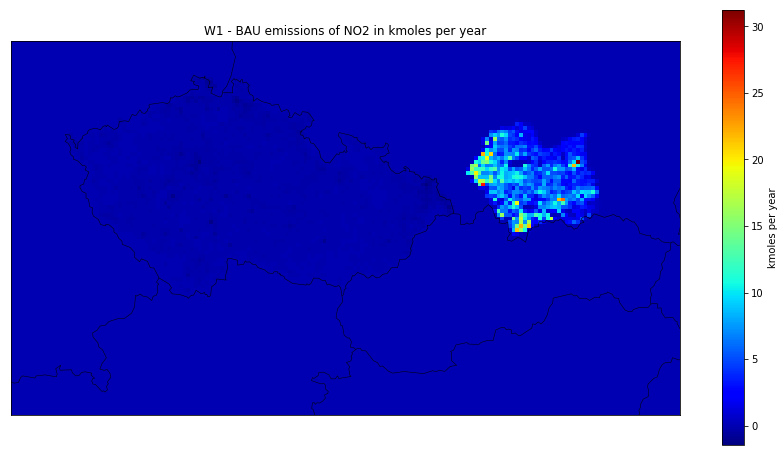

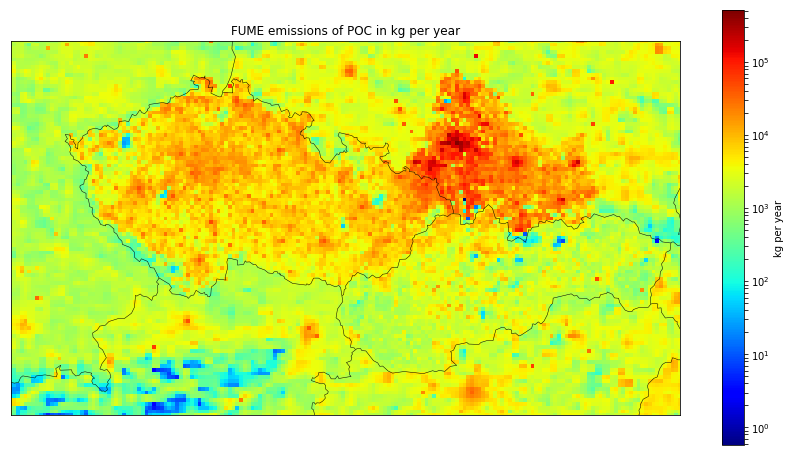

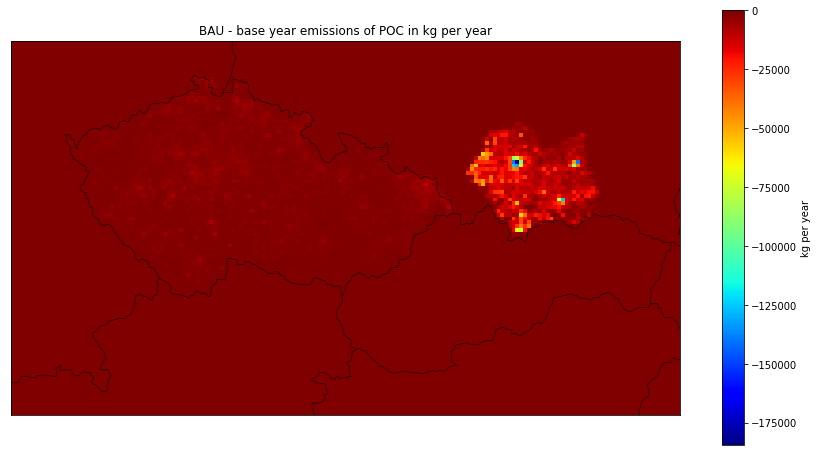

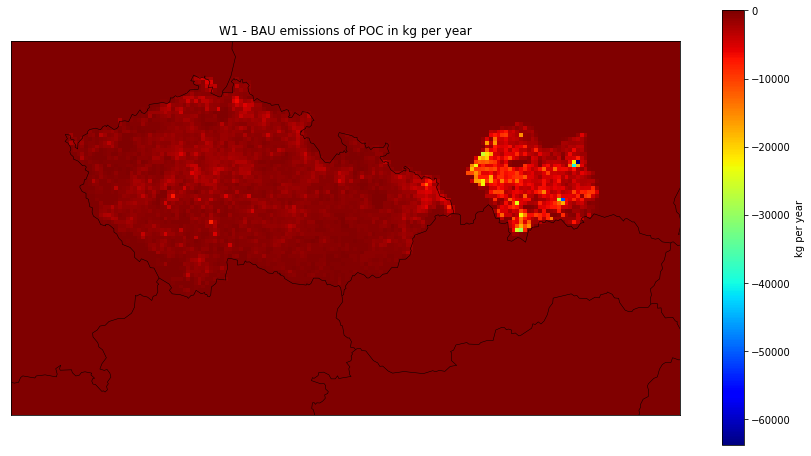

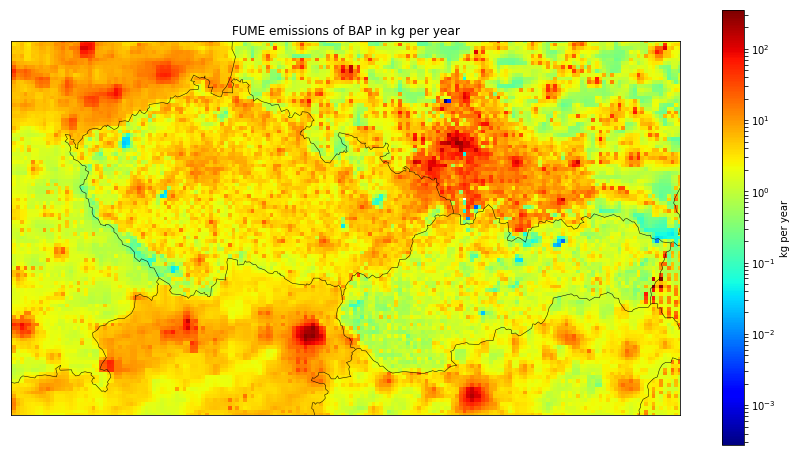

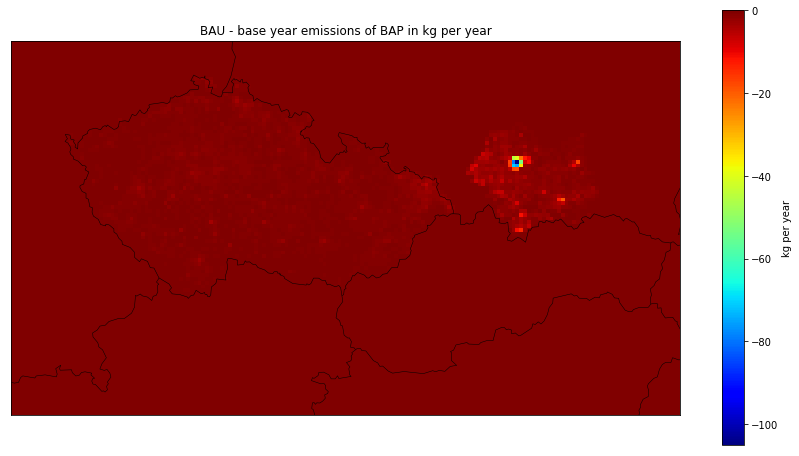

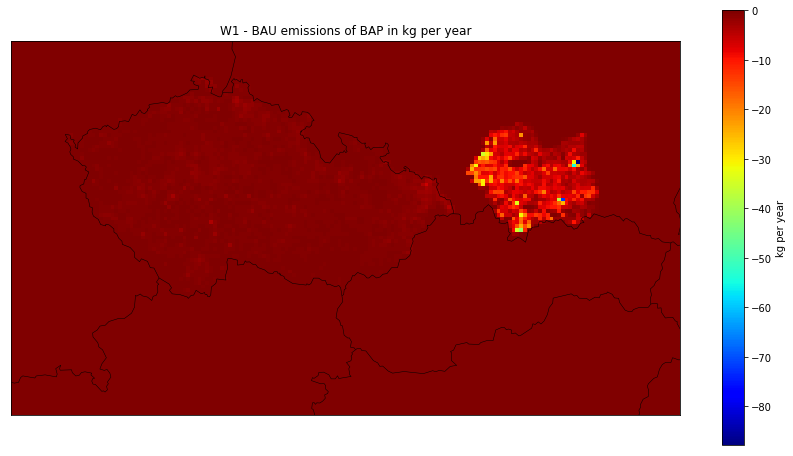

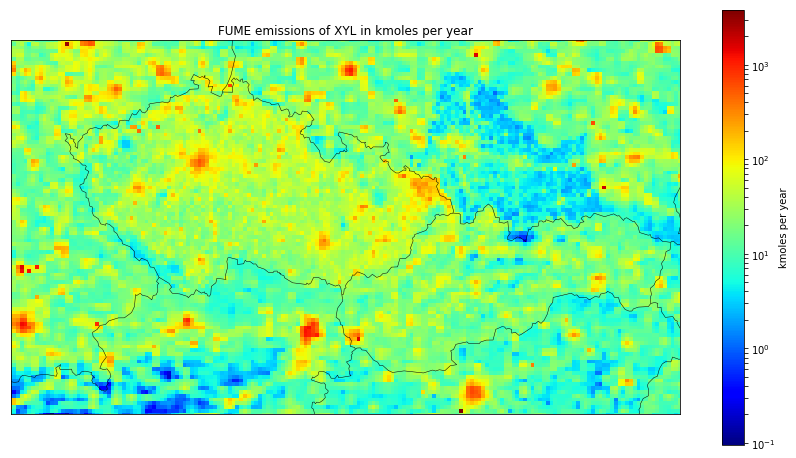

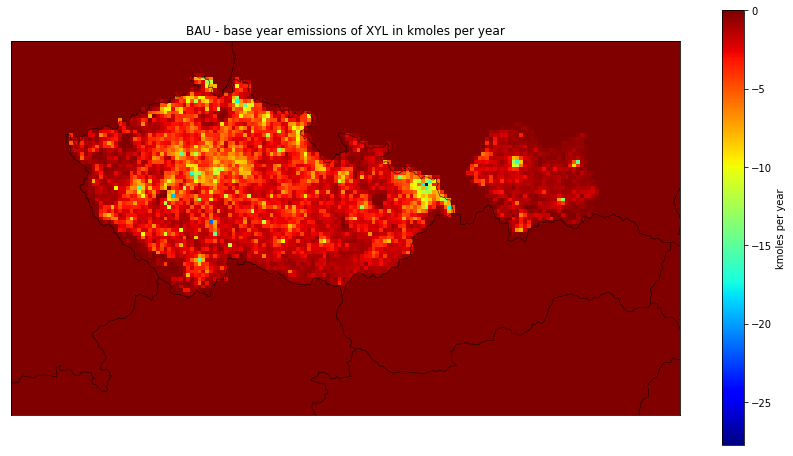

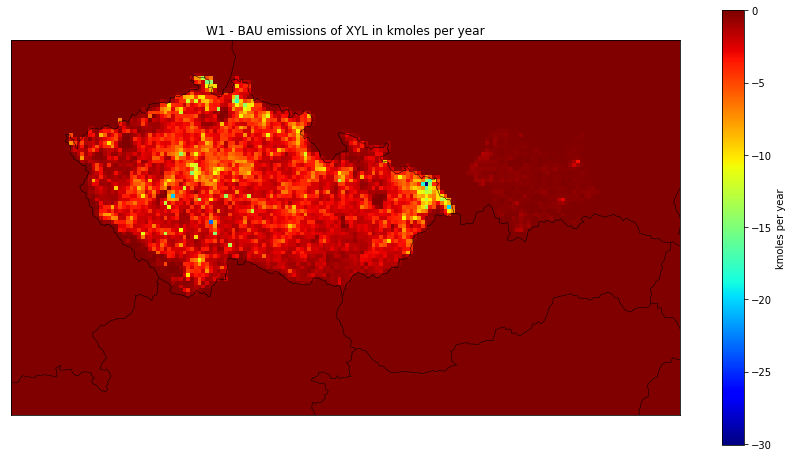

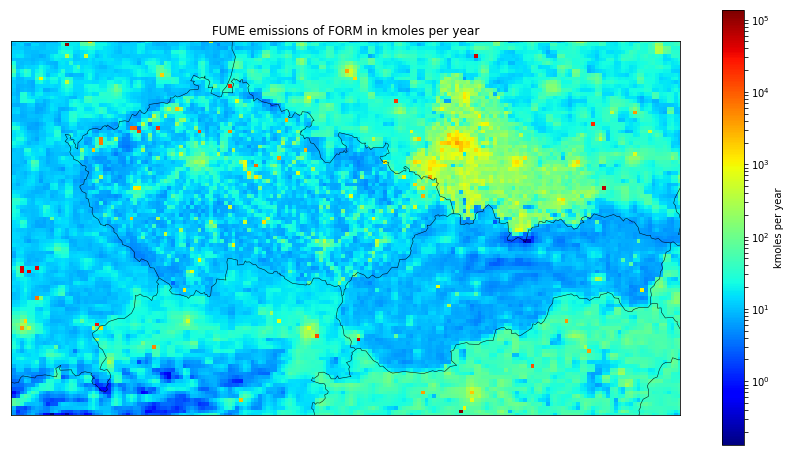

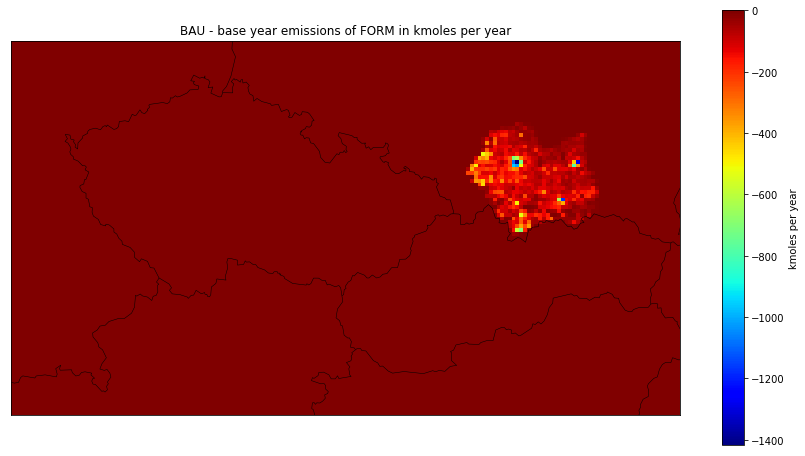

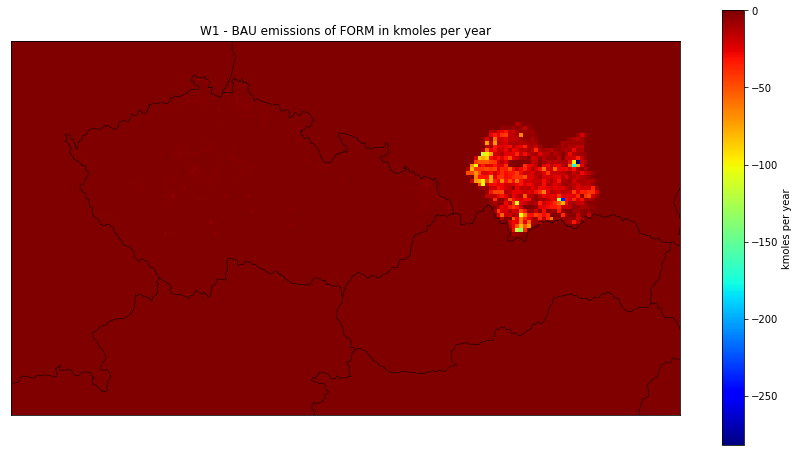

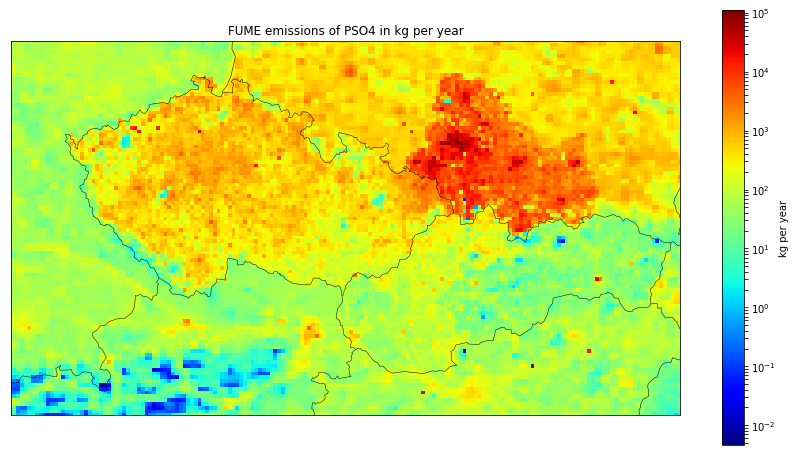

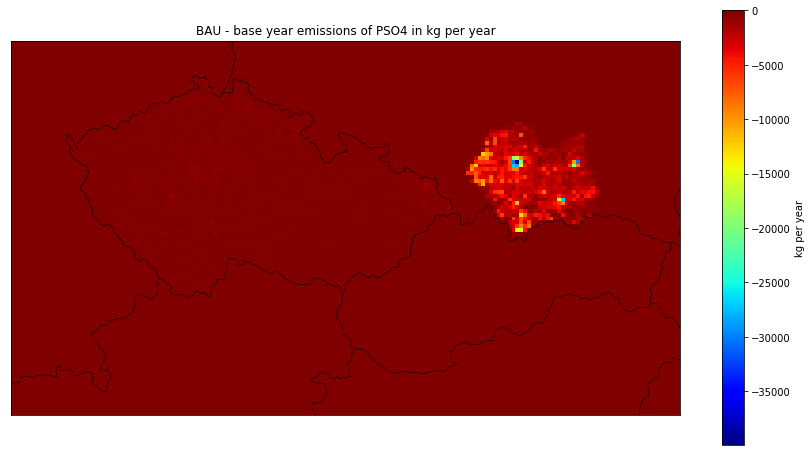

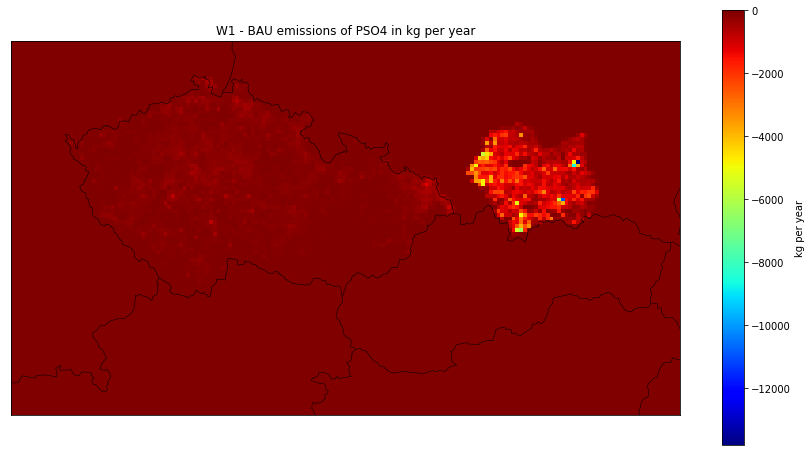

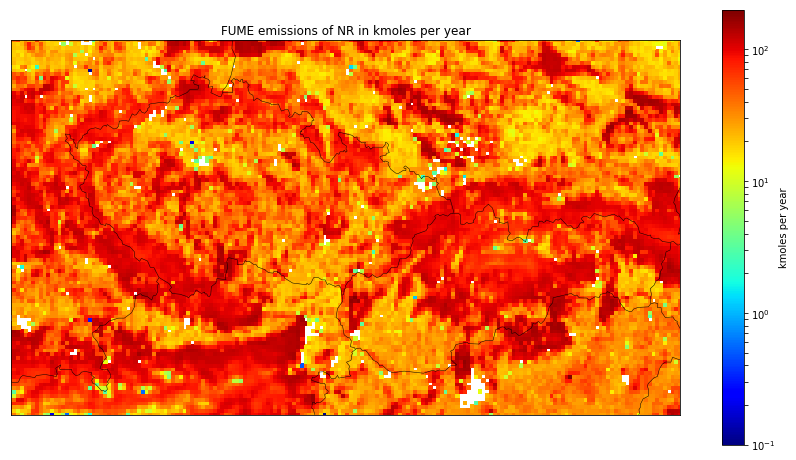

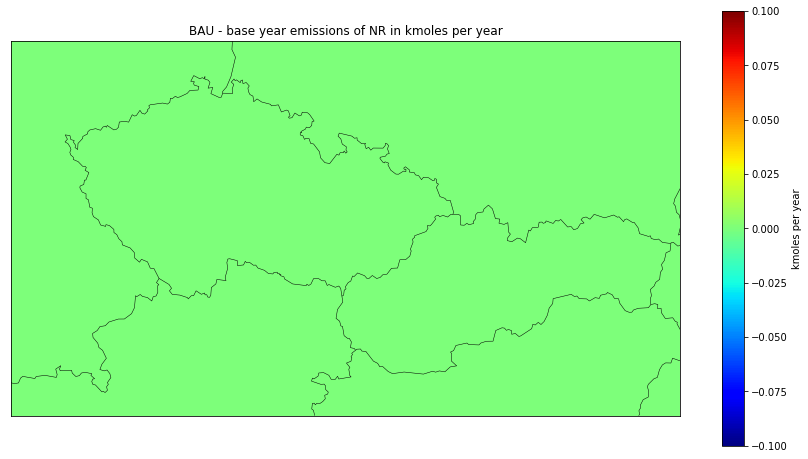

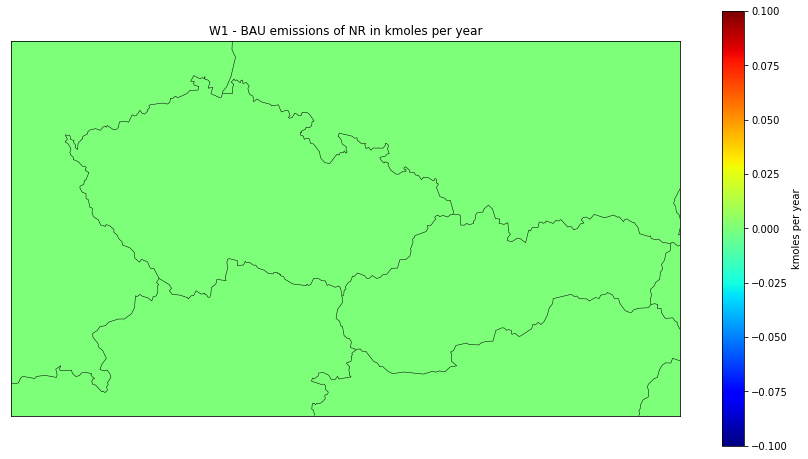

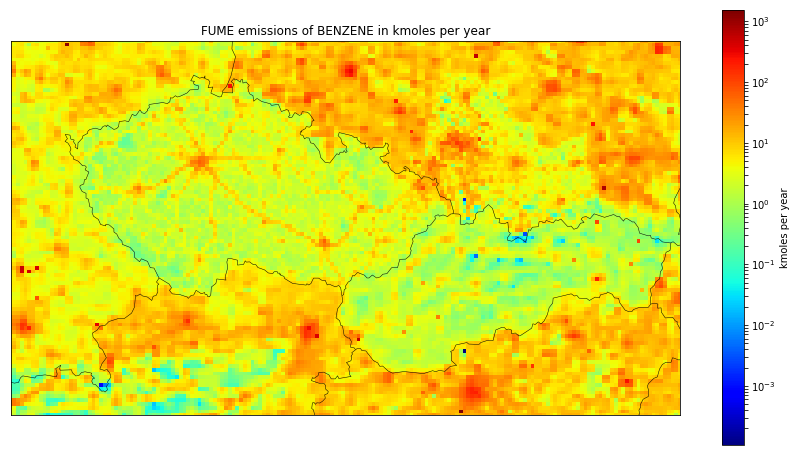

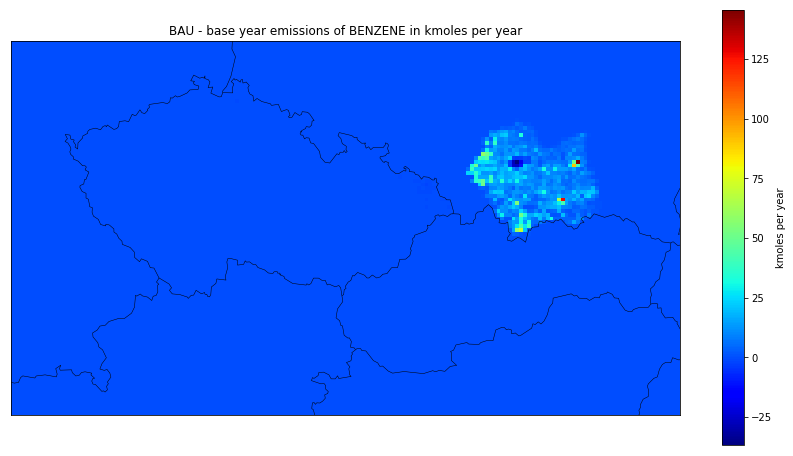

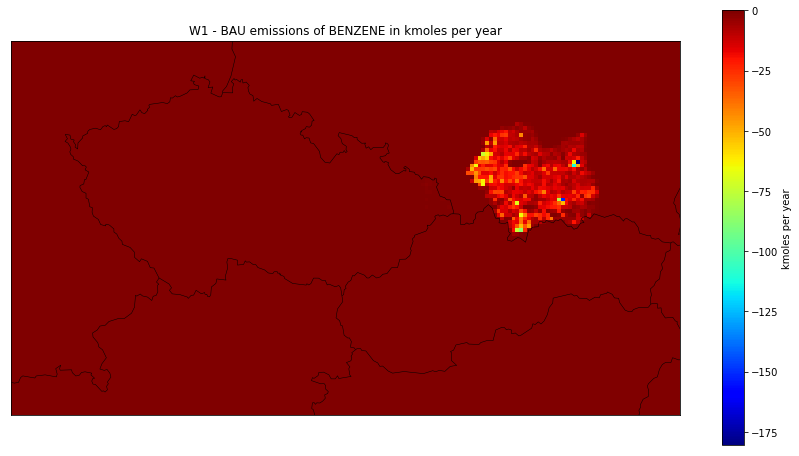

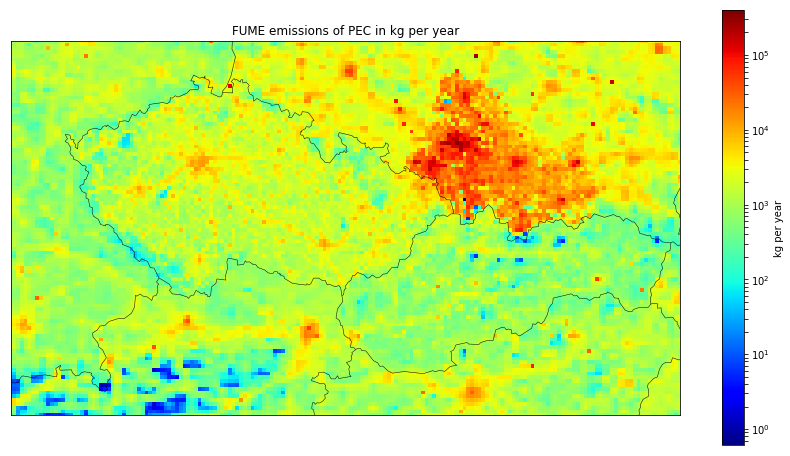

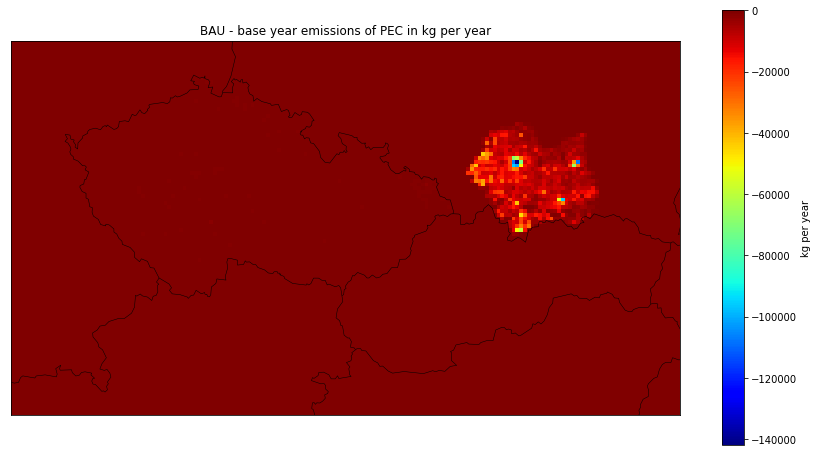

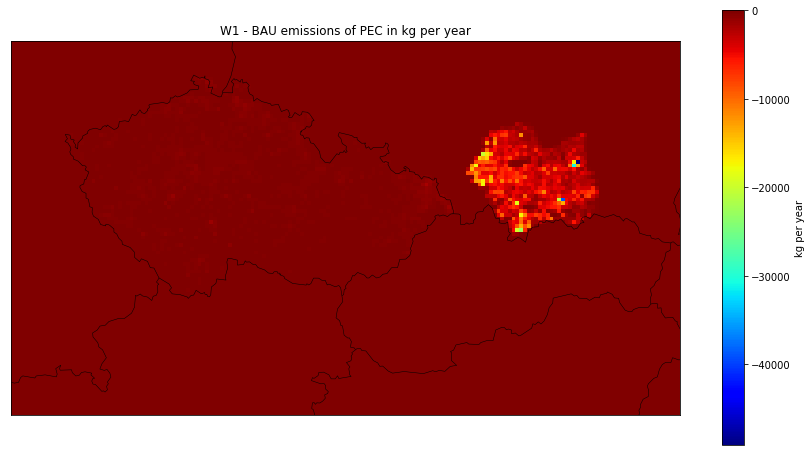

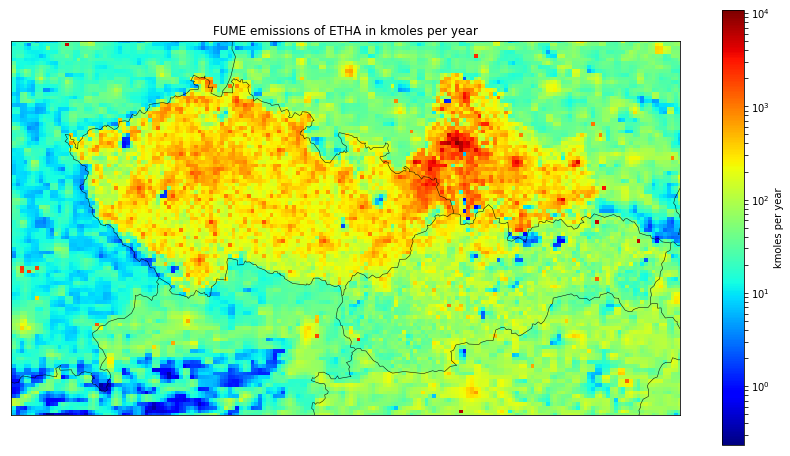

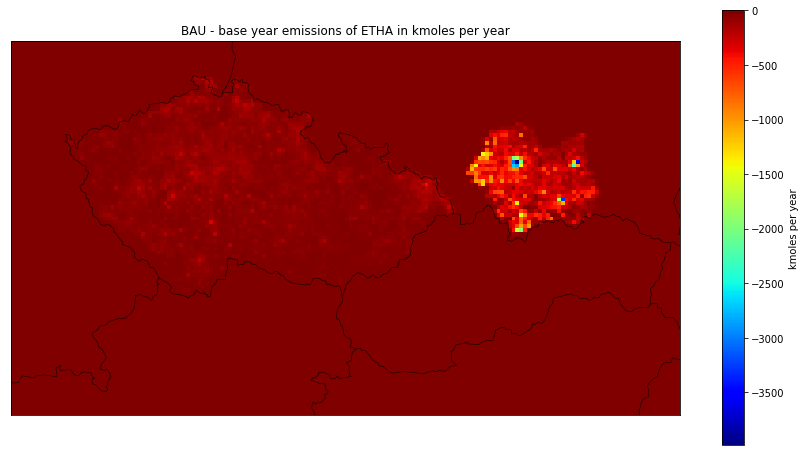

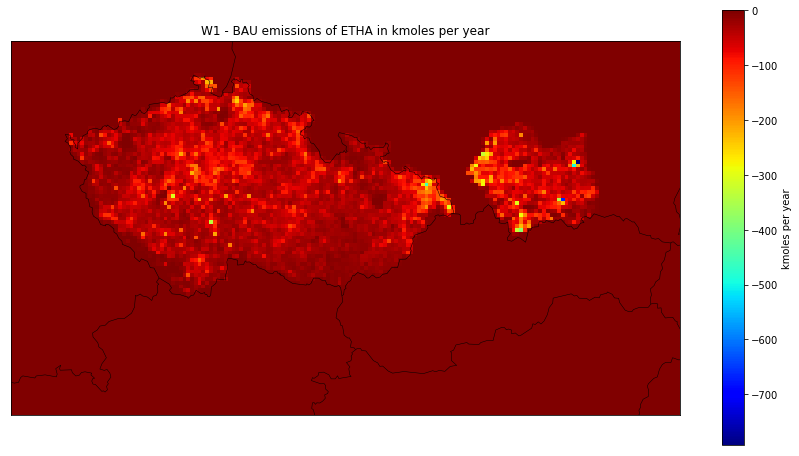

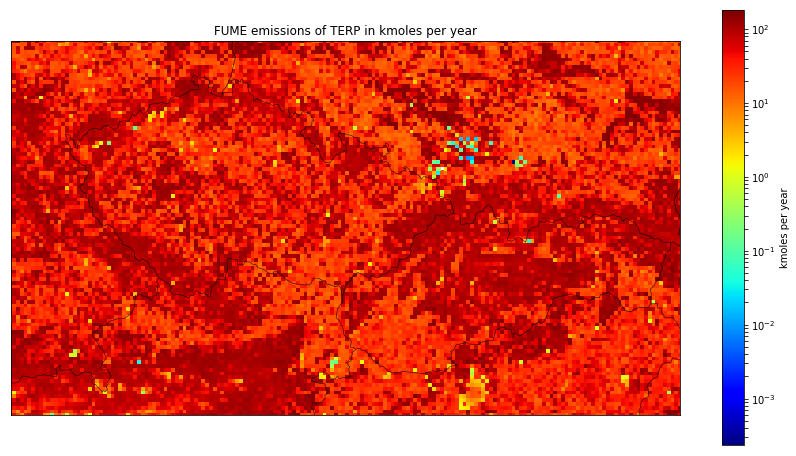

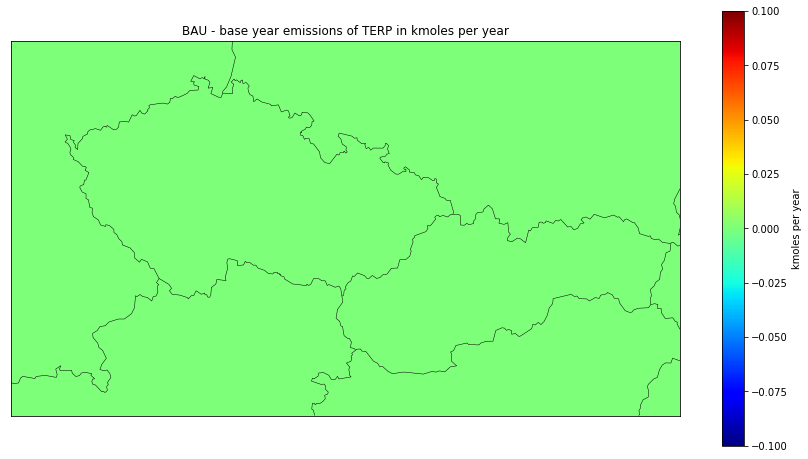

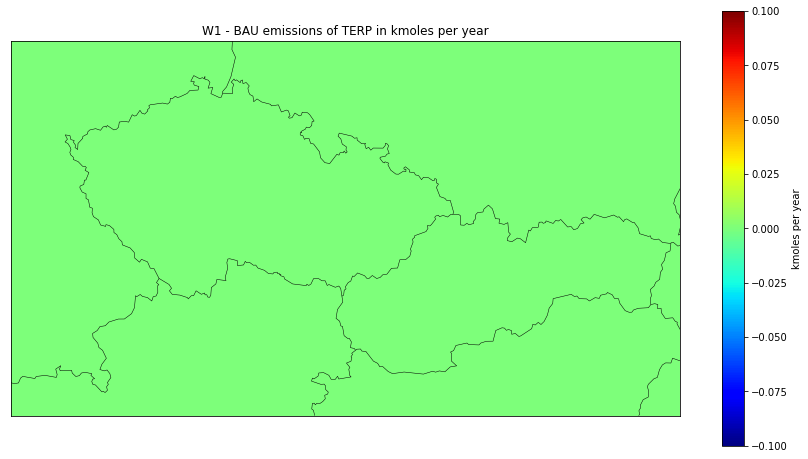

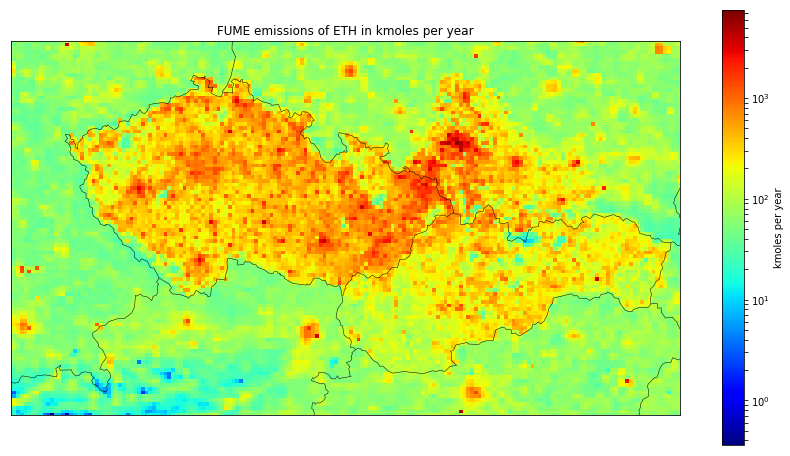

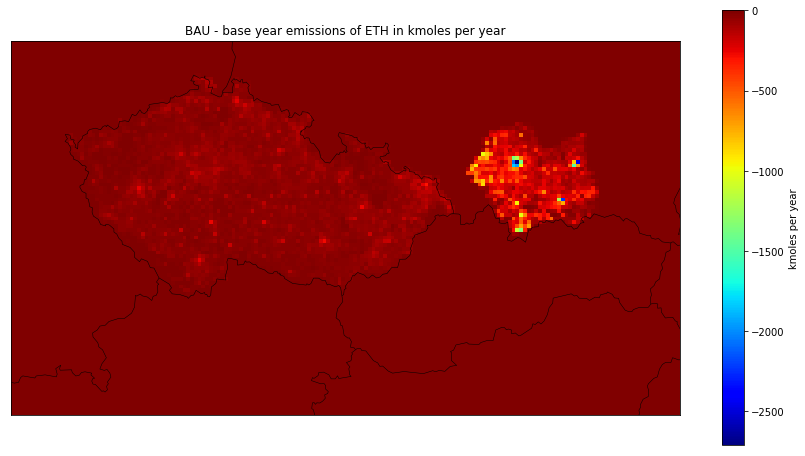

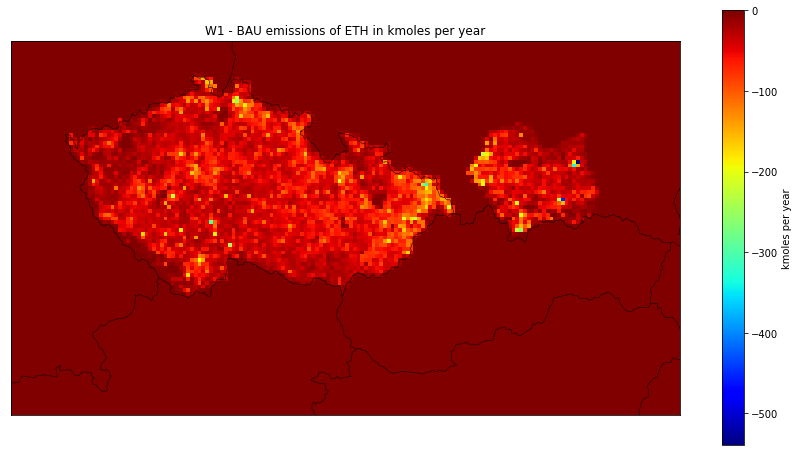

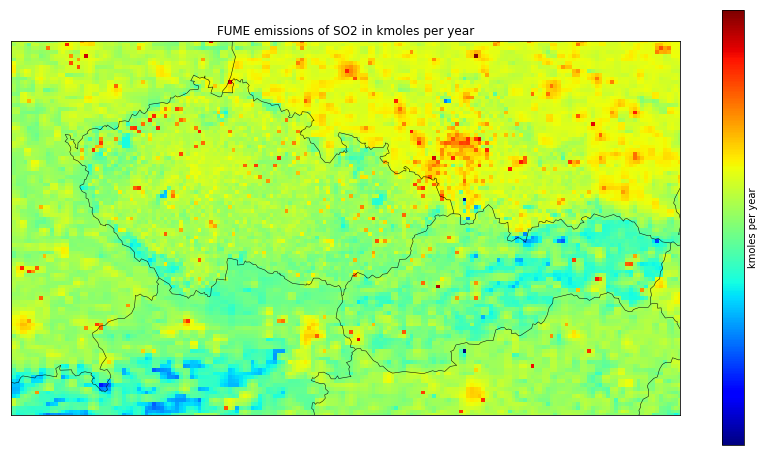

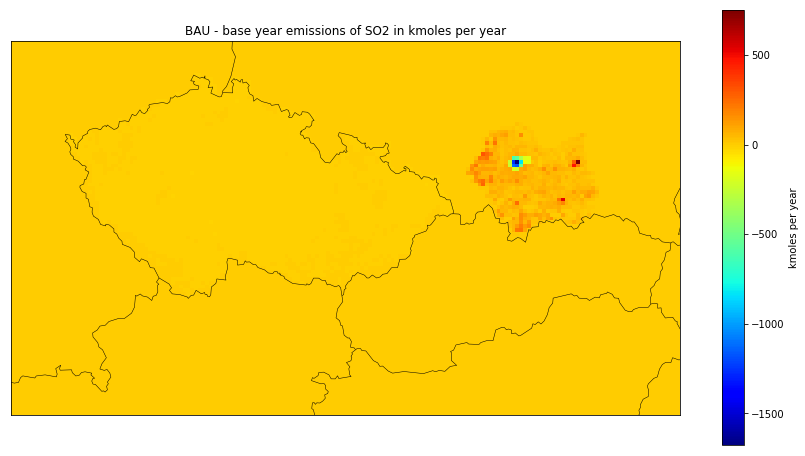

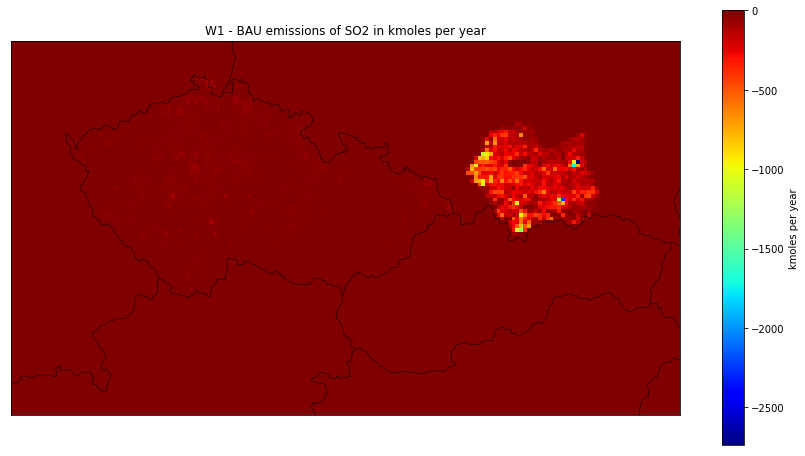

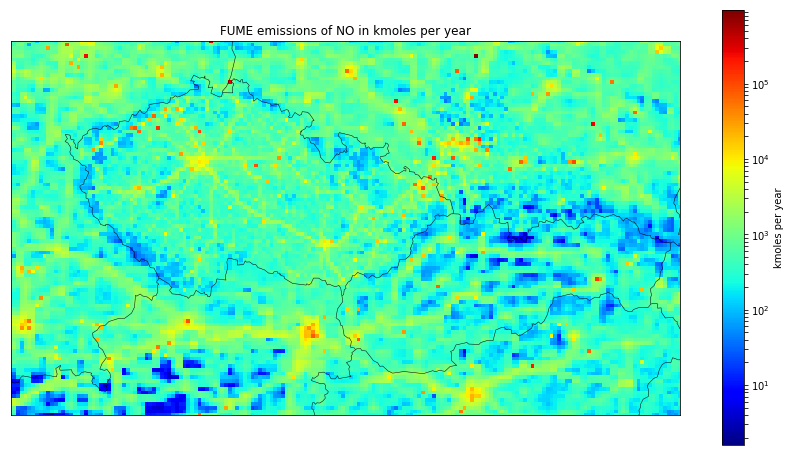

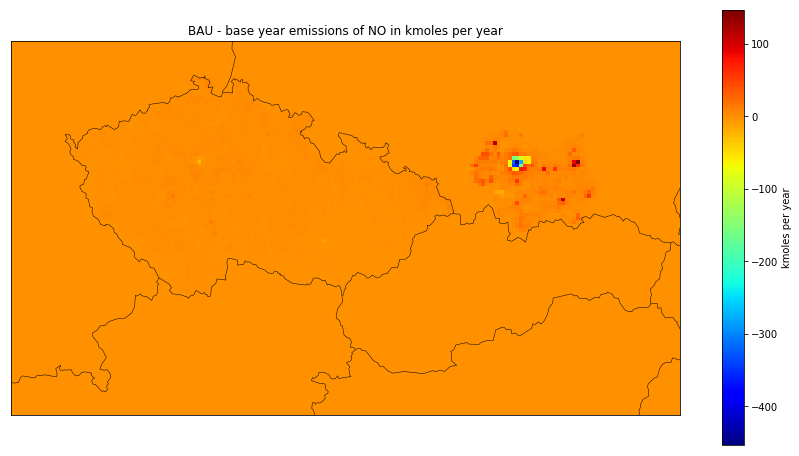

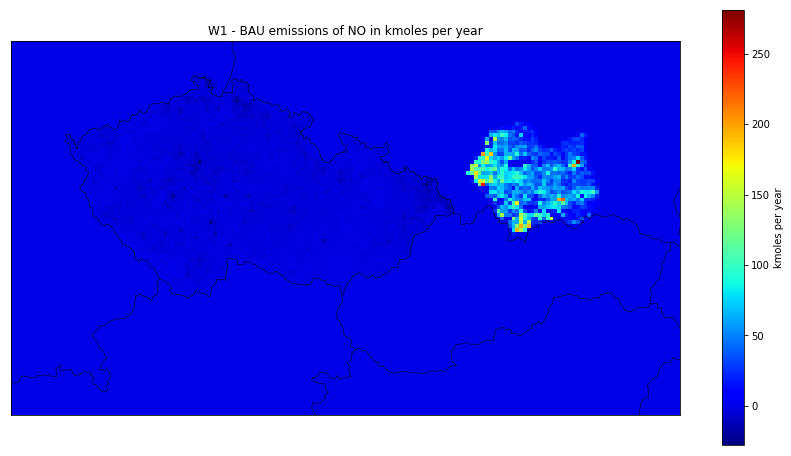

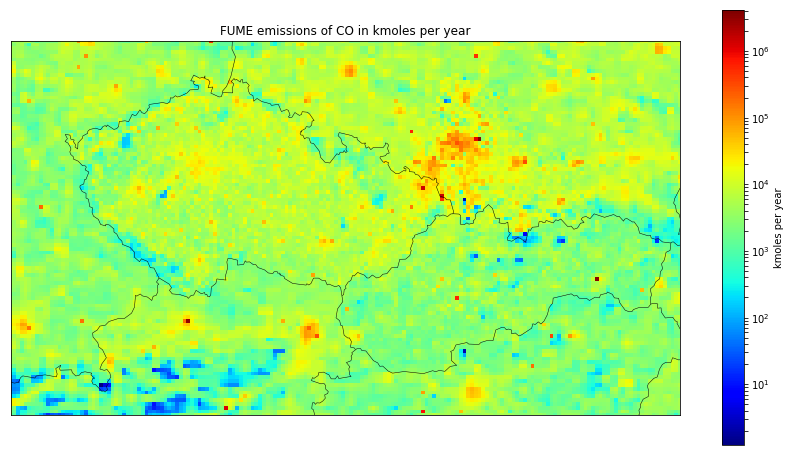

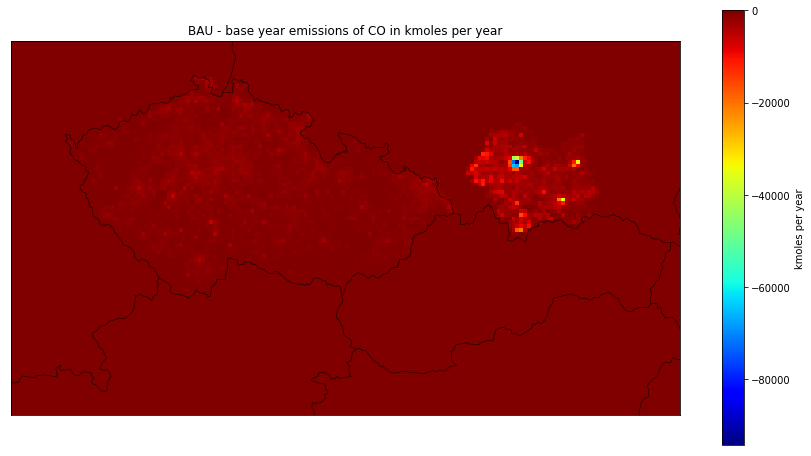

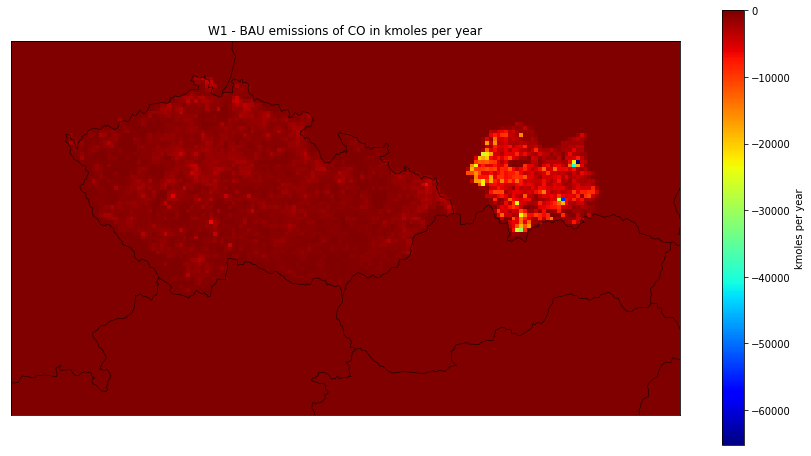

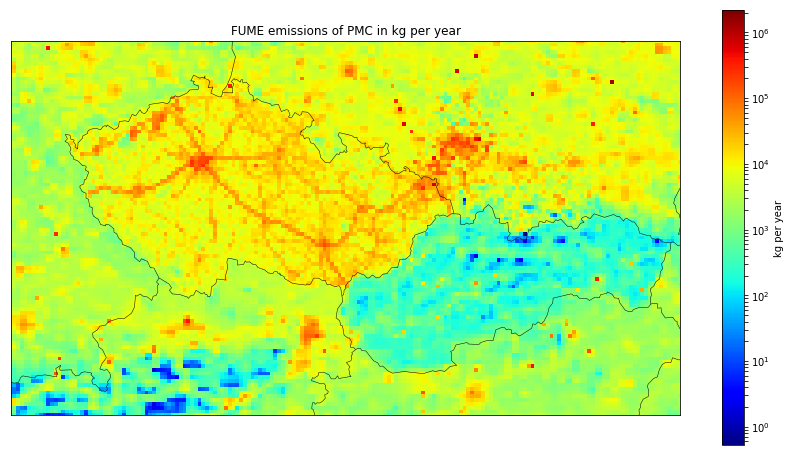

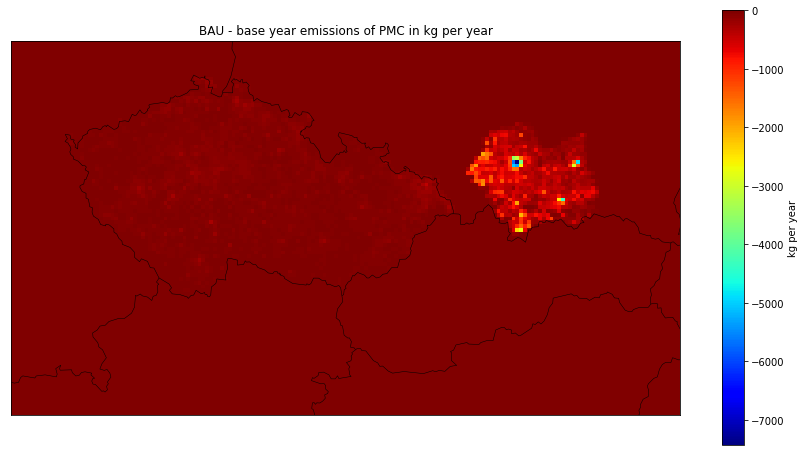

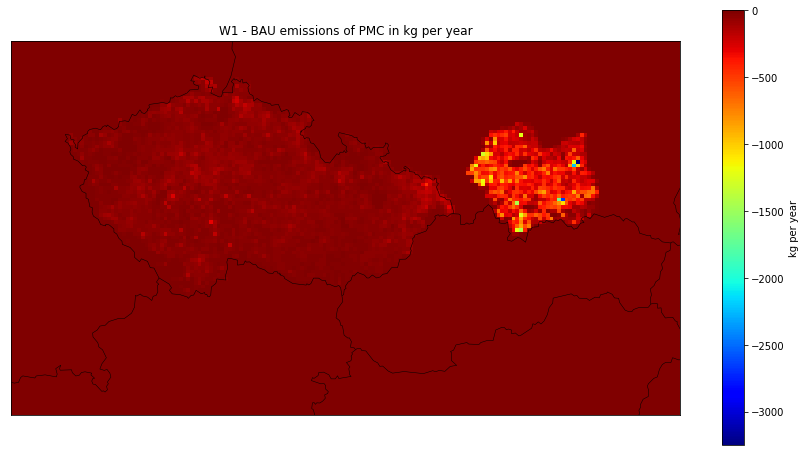

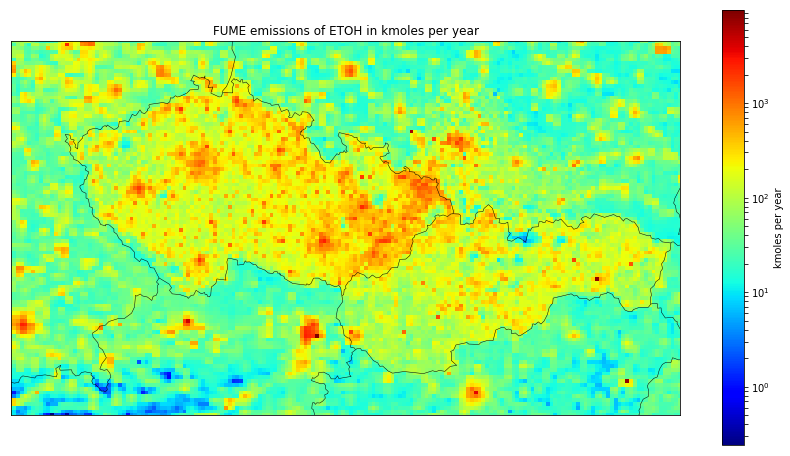

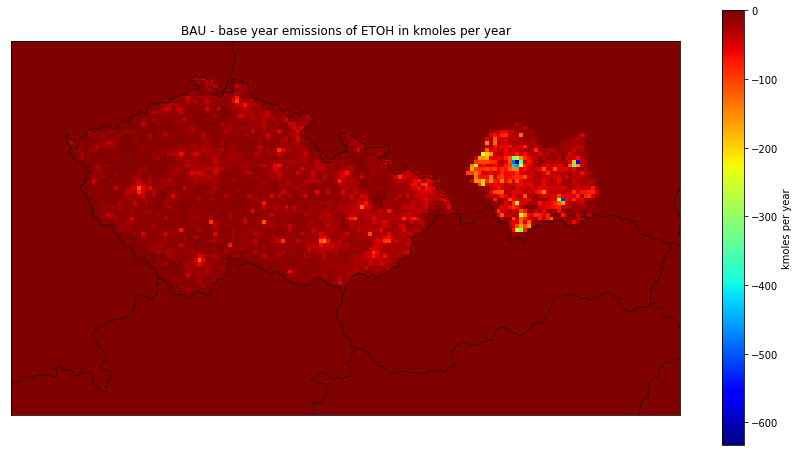

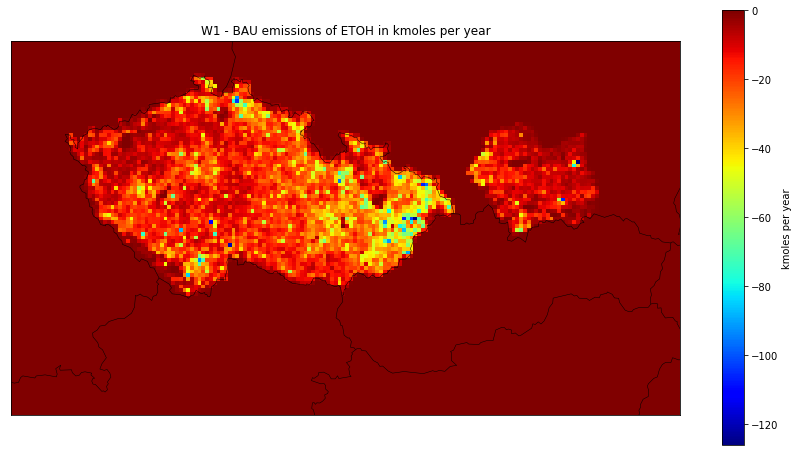

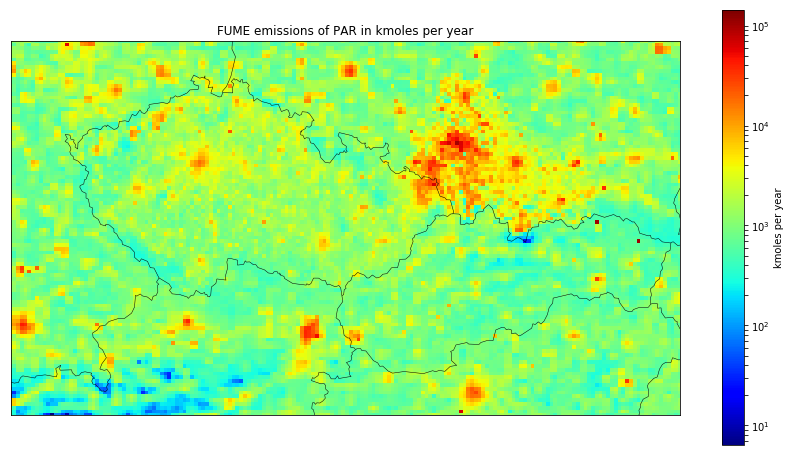

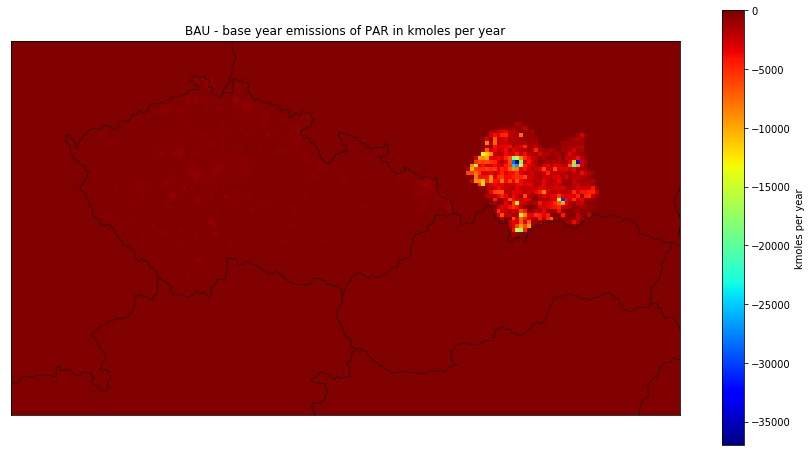

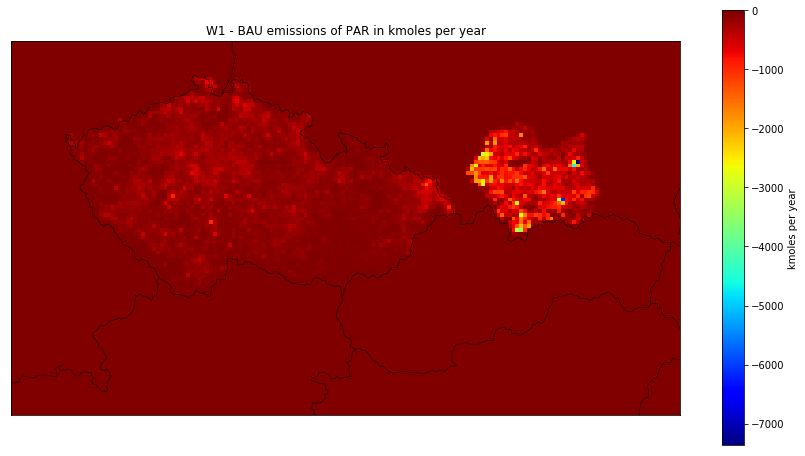

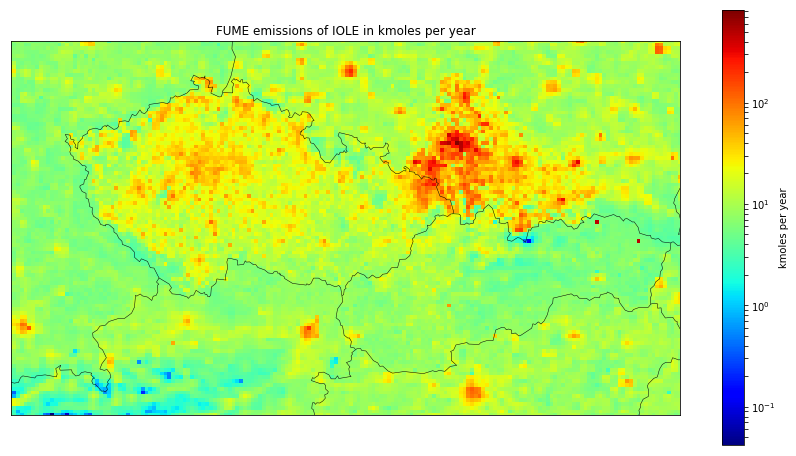

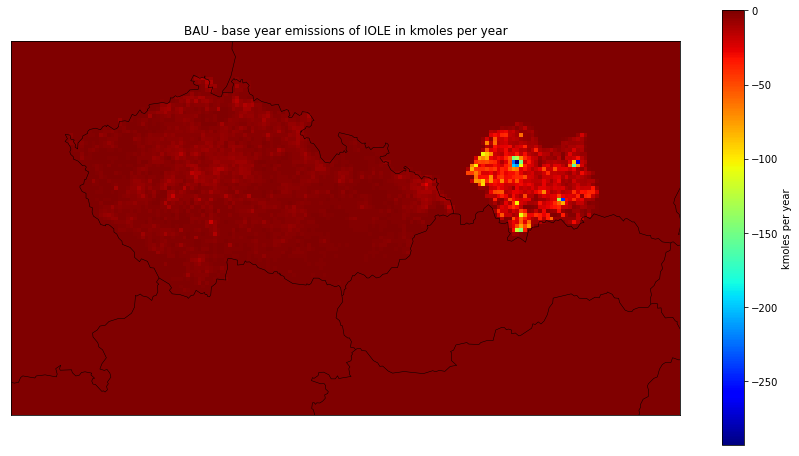

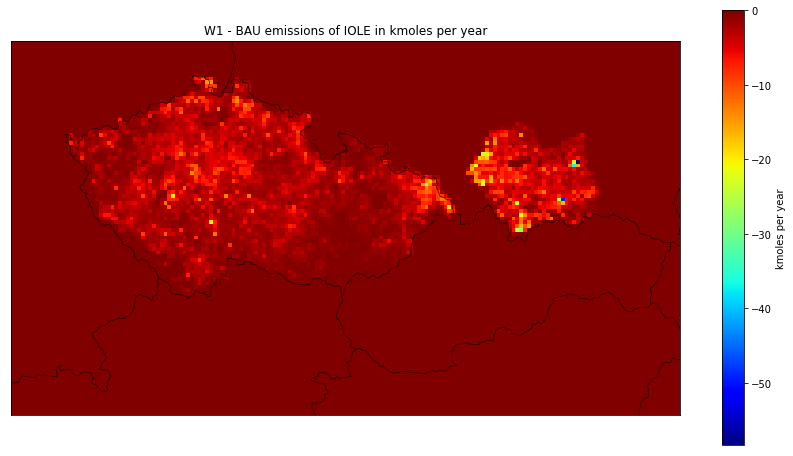

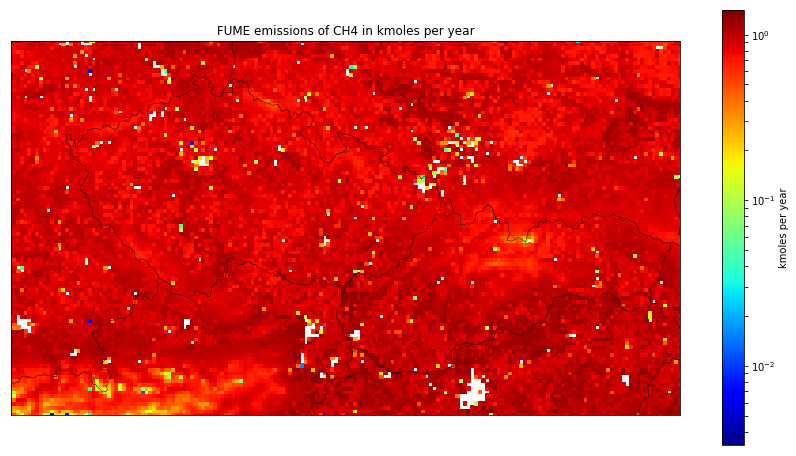

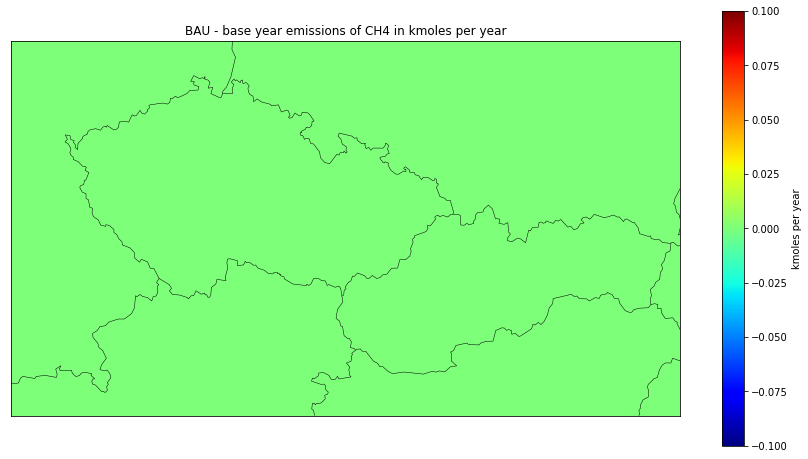

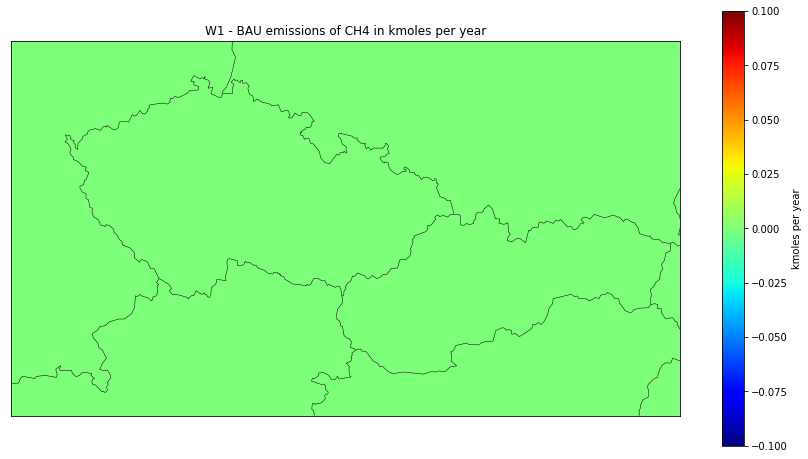

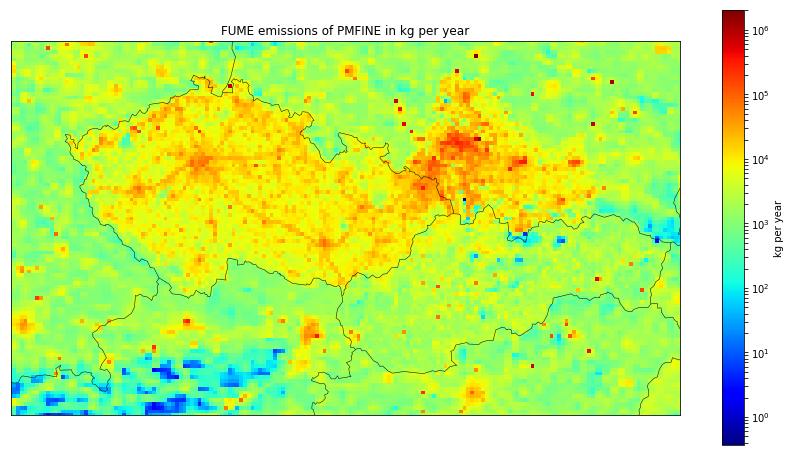

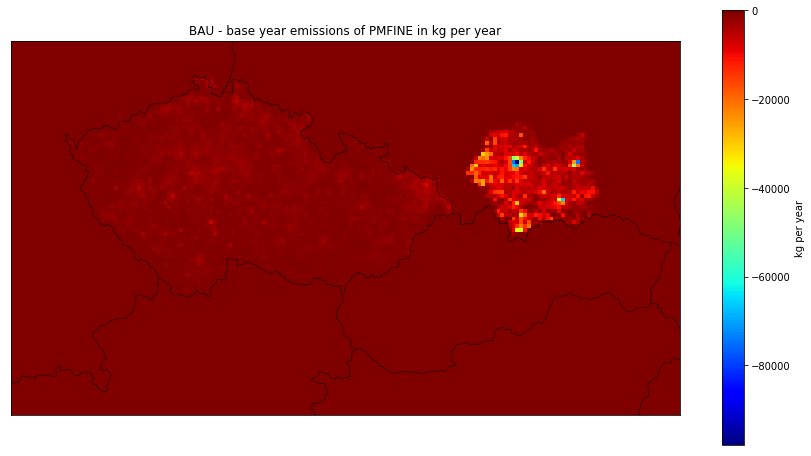

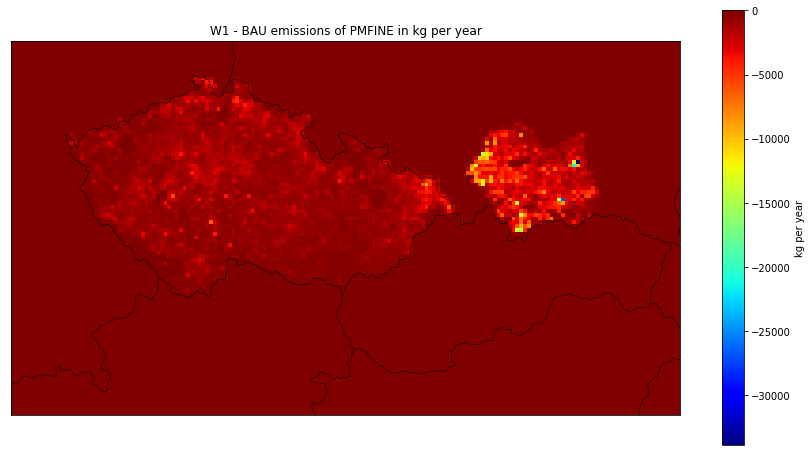

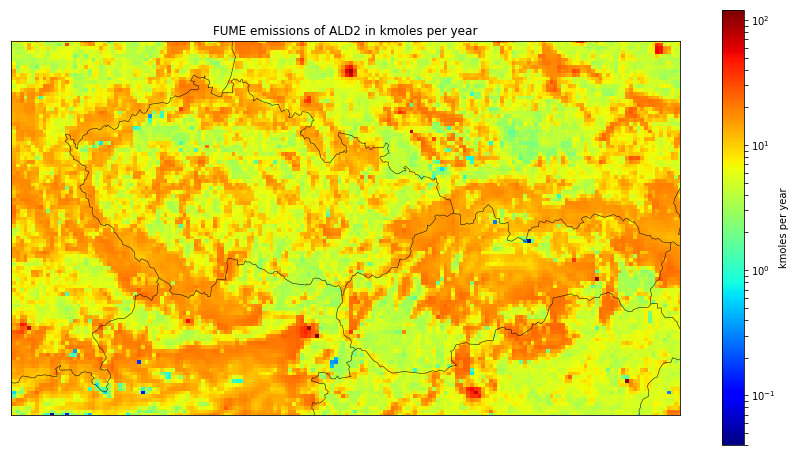

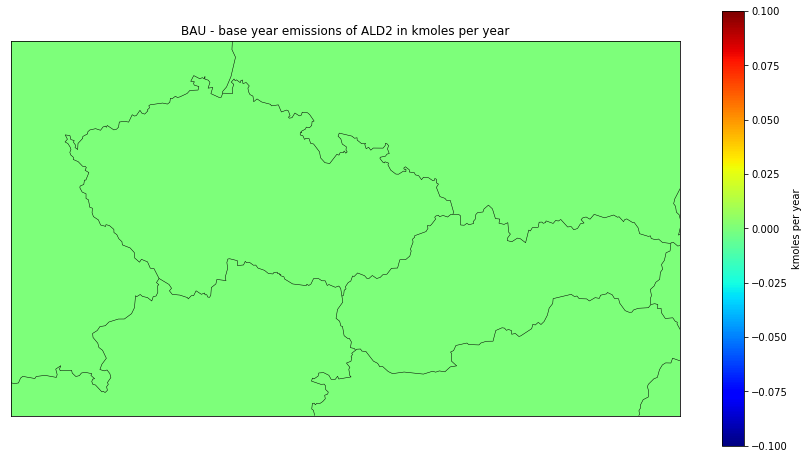

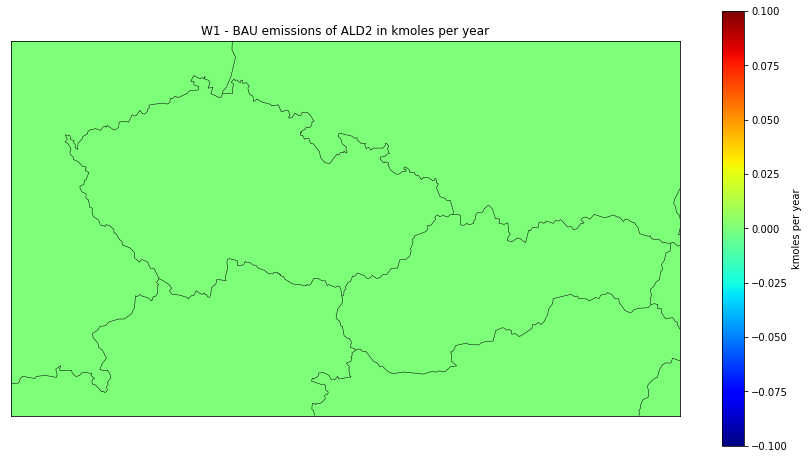

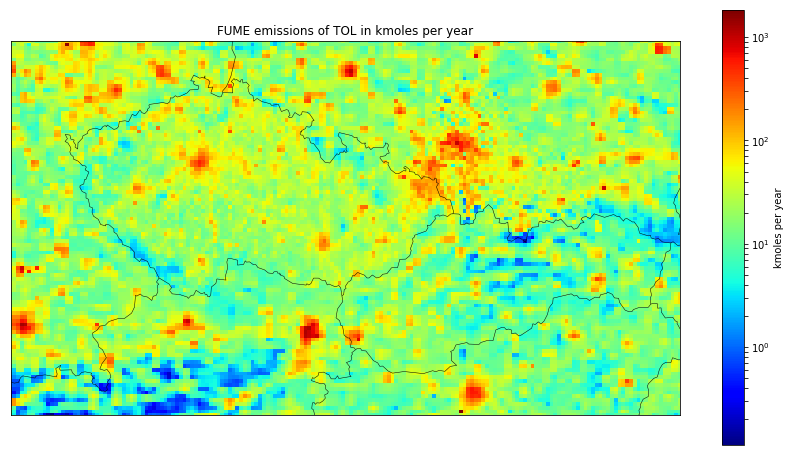

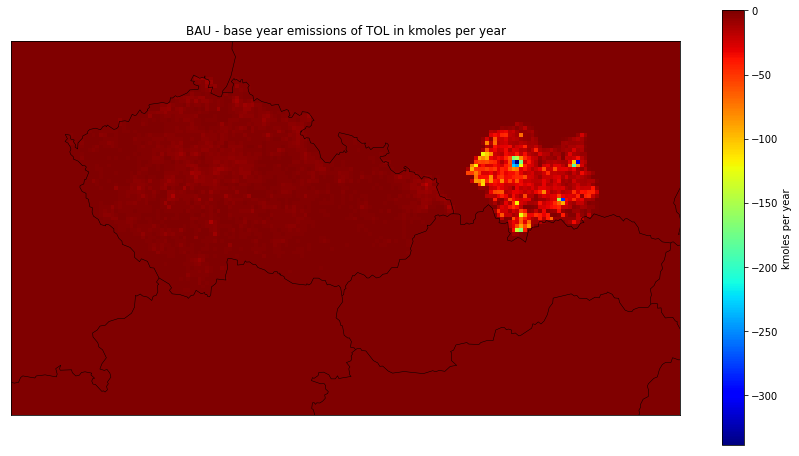

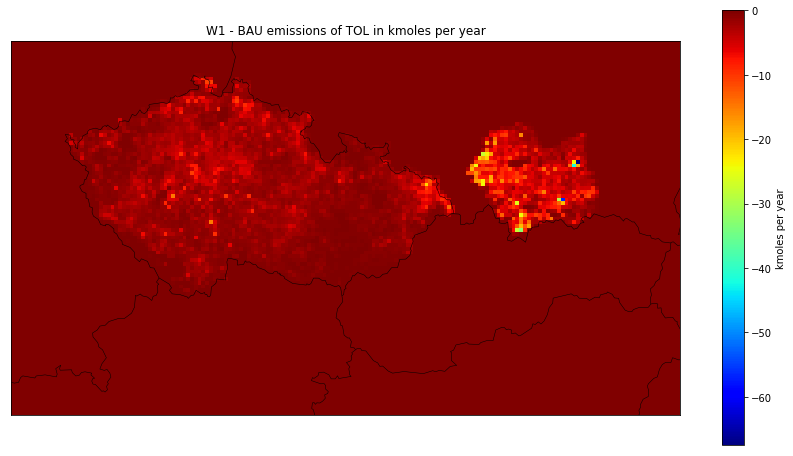

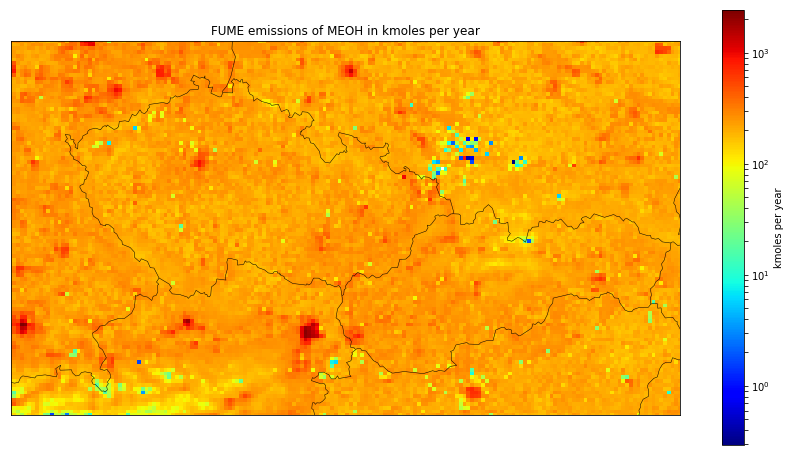

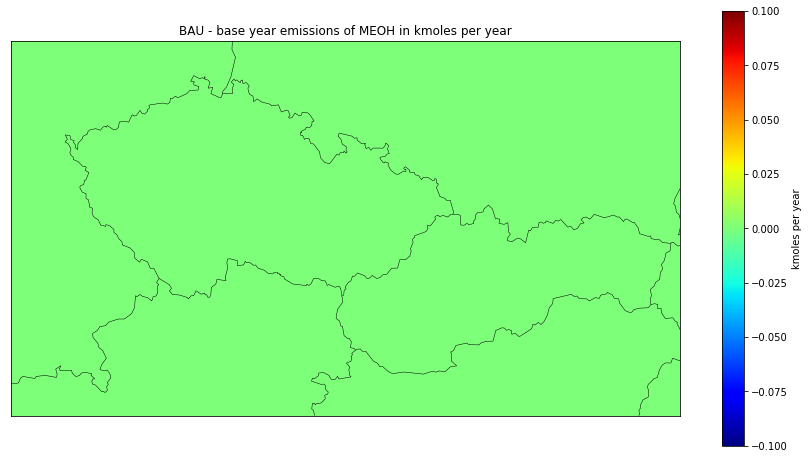

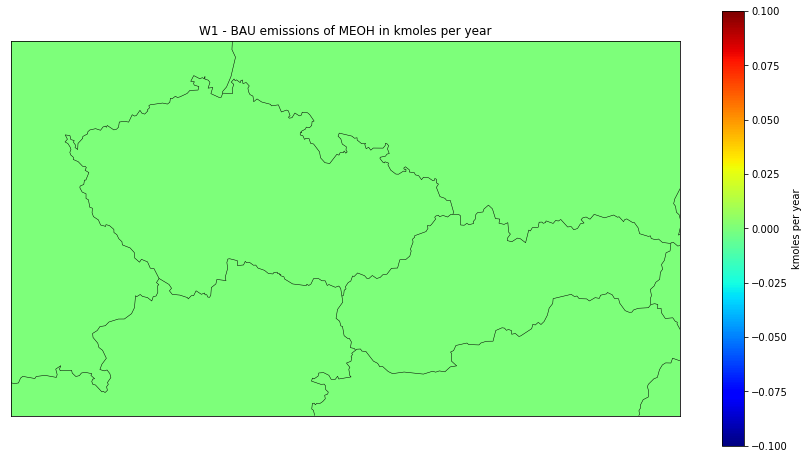

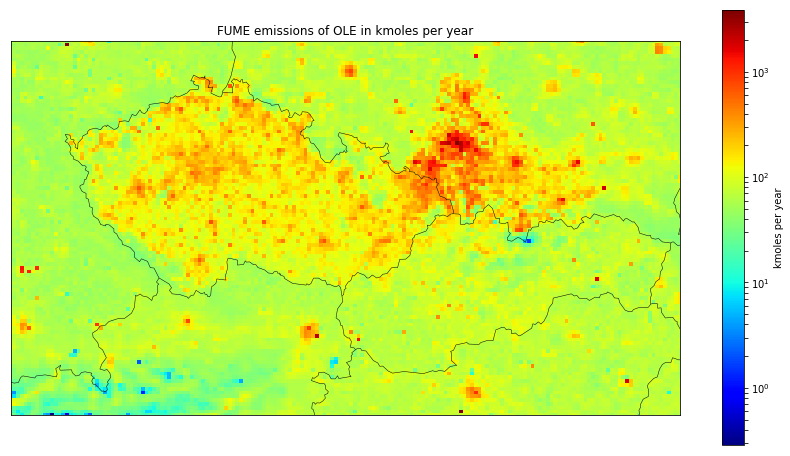

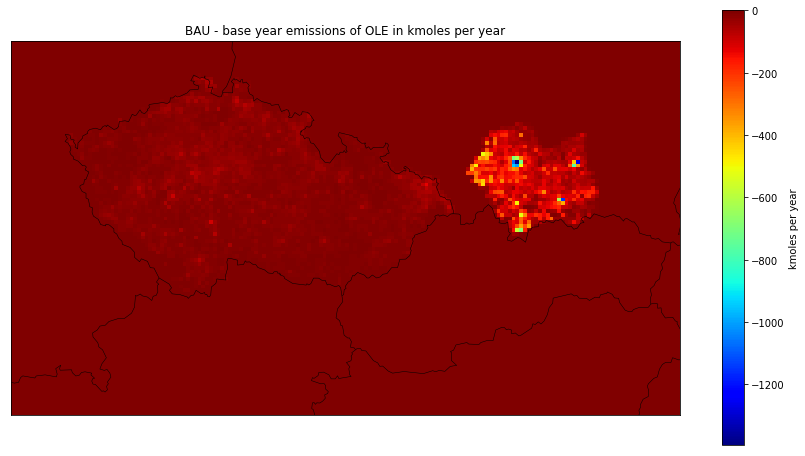

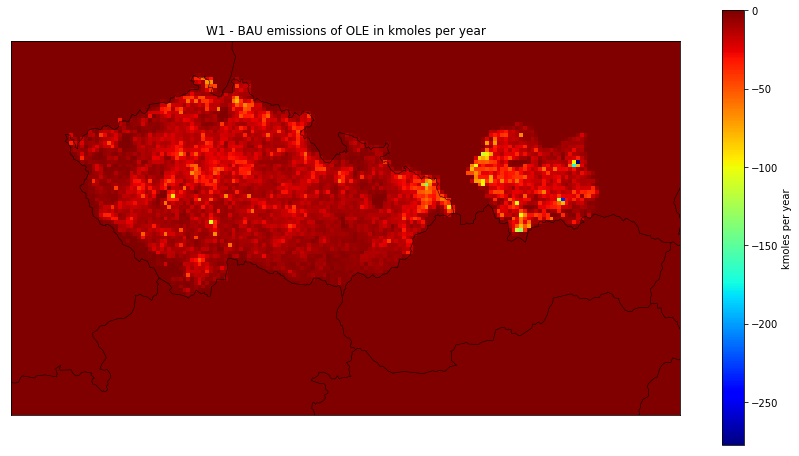

In [9]:
mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833780,height=466351,resolution='i')
        

for i in dic_ann.keys():
    if i!='PNO3': 
        units=emissions.variables[i].units

        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='{0} per year'.format(units))
        plt.title('FUME emissions of {0} in {1} per year'.format(i,units))
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        
        #############################################################################################
        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_ann_BAU[i]-dic_ann[i],cmap=plt.cm.jet,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='{0} per year'.format(units))
        plt.title('BAU - base year emissions of {0} in {1} per year'.format(i,units))
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        
        #############################################################################################
        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_ann_W1[i]-dic_ann_BAU[i],cmap=plt.cm.jet,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='{0} per year'.format(units))
        plt.title('W1 - BAU emissions of {0} in {1} per year'.format(i,units))
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        
        ############################################################################################### 

DIFF. IN ANNUAL EMISSIONS

In [13]:
list_diff_plyn_p=[]
list_diff_plyn_m=[]
list_diff_cas=[]
plyny_p=[]
plyny_m=[]
castice=[]
for i in dic_ann.keys():
    dif=np.sum(dic_ann_BAU[i])-np.sum(dic_ann[i])
    difW1=np.sum(dic_ann_W1[i])-np.sum(dic_ann[i])
    if emissions.variables[i].units == 'kmoles':
        if dif > 0:
            list_diff_plyn_p.append(dif)
            plyny_p.append(i)
        else:
            list_diff_plyn_m.append(dif)
            plyny_m.append(i)
        
    else:
        list_diff_cas.append(dif)
        castice.append(i)
    print('{} difference BAU - base year:'.format(i),dif,emissions.variables[i].units)    
    print('{} difference W1  - base year:'.format(i),difW1,emissions.variables[i].units)
    print('#######################')

NH3 difference BAU - base year: -13920.0 kmoles
NH3 difference W1  - base year: -33338.0 kmoles
#######################
ALDX difference BAU - base year: -0.046875 kmoles
ALDX difference W1  - base year: -0.09375 kmoles
#######################
ISOP difference BAU - base year: 0.0 kmoles
ISOP difference W1  - base year: 0.0 kmoles
#######################
NO2 difference BAU - base year: 5321.75 kmoles
NO2 difference W1  - base year: 8778.875 kmoles
#######################
POC difference BAU - base year: -13838448.0 kg
POC difference W1  - base year: -21509104.0 kg
#######################
BAP difference BAU - base year: -3741.7578 kg
BAP difference W1  - base year: -10664.852 kg
#######################
XYL difference BAU - base year: -12029.5625 kmoles
XYL difference W1  - base year: -23368.438 kmoles
#######################
FORM difference BAU - base year: -87532.625 kmoles
FORM difference W1  - base year: -105961.625 kmoles
#######################
PSO4 difference BAU - base year: -246808

SUMM ALL PM EMISSIONS AND COMPARISON

In [14]:
empty=dic_ann['PNO3']
empty_W1=dic_ann['PNO3']
empty_BAU=dic_ann['PNO3']
for i in dic_ann.keys():
    if i.startswith('P') and i!='PAR':
       print(i)
       empty=empty+dic_ann[i]
       empty_BAU=empty_BAU+dic_ann_BAU[i] 
       empty_W1=empty_W1+dic_ann_W1[i]


POC
PSO4
PEC
PMC
PMFINE
PNO3


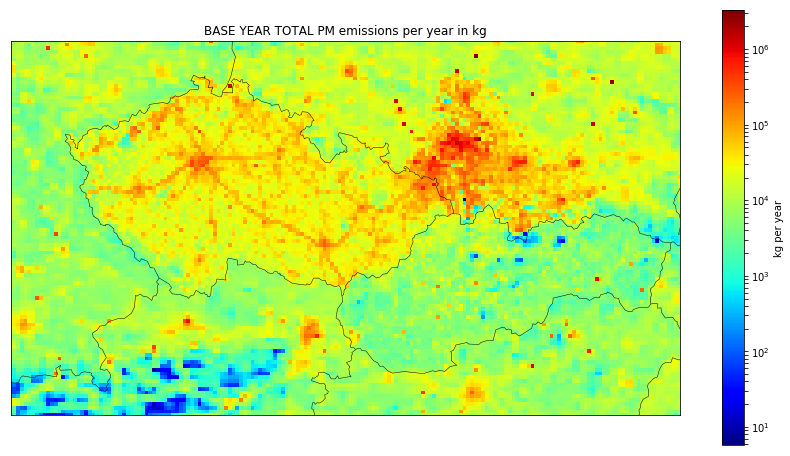

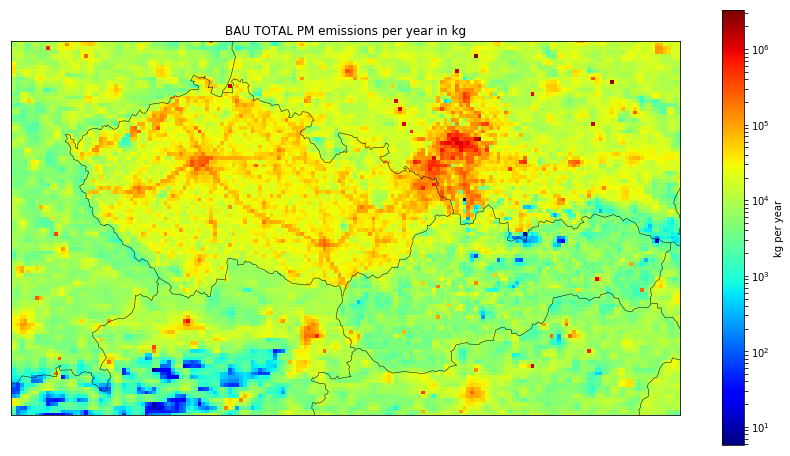

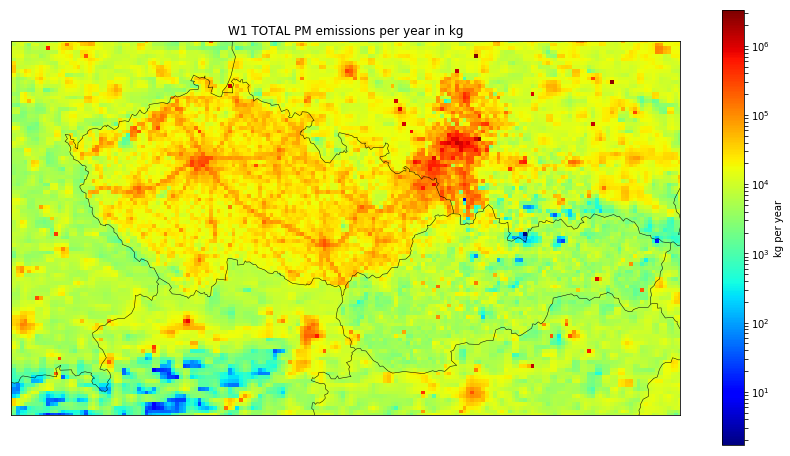

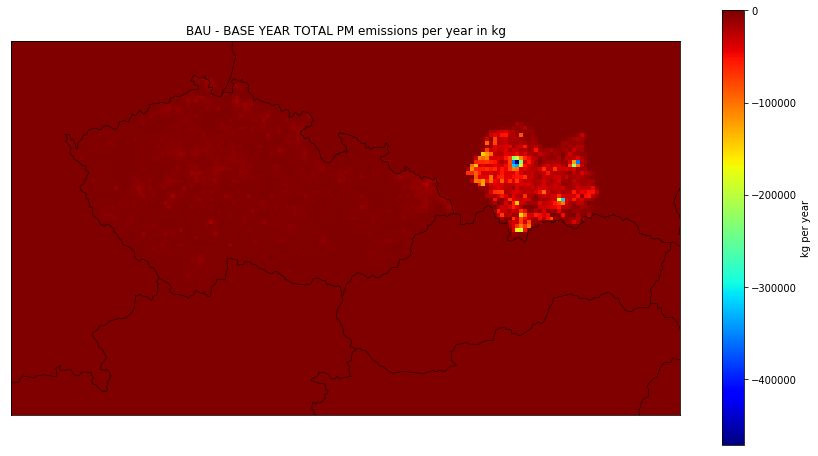

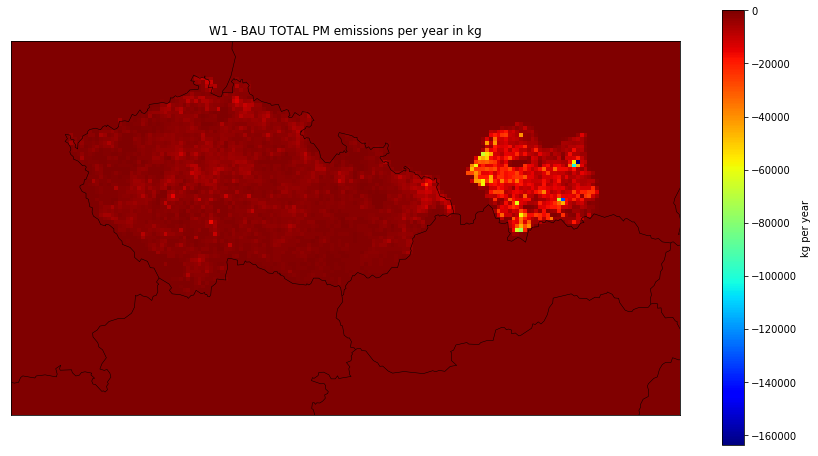

In [18]:
units='kg'
mapb.drawcountries()

# choose one of the two style of the plot
mapb.pcolormesh(lon,lat,empty,cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('BASE YEAR TOTAL PM emissions per year in {}'.format(units))
plt.show()
plt.close()

###########################################################################################################

mapb.drawcountries()

# choose one of the two style of the plot
mapb.pcolormesh(lon,lat,empty_BAU,cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('BAU TOTAL PM emissions per year in {}'.format(units))
plt.show()
plt.close()

#############################################################################################################

mapb.drawcountries()

# choose one of the two style of the plot
mapb.pcolormesh(lon,lat,empty_W1,cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('W1 TOTAL PM emissions per year in {}'.format(units))
plt.show()
plt.close()

###########################################################################################################
mapb.drawcountries()

# choose one of the two style of the plot
mapb.pcolormesh(lon,lat,empty_BAU-empty,cmap=plt.cm.jet,latlon=True) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('BAU - BASE YEAR TOTAL PM emissions per year in {}'.format(units))
plt.show()
plt.close()

###########################################################################################################
mapb.drawcountries()

# choose one of the two style of the plot
mapb.pcolormesh(lon,lat,empty_W1-empty_BAU,cmap=plt.cm.jet,latlon=True) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('W1 - BAU TOTAL PM emissions per year in {}'.format(units))
plt.show()
plt.close()


In [21]:
print('{} diff. bus_as_ussual - base year'.format('PM_tot'))
dif=0.000001*(np.sum(empty_BAU)-np.sum(empty))
print(dif,'kton')
print('{} diff. W1 - base year'.format('PM_tot'))
dif=0.000001*(np.sum(empty_W1)-np.sum(empty))
print(dif,'kton')

PM_tot diff. bus_as_ussual - base year
-33.223327999999995 kton
PM_tot diff. W1 - base year
-50.943008 kton
